In [1]:
print("hola mundo ")

hola mundo 


# COMPARACION DE DOS POBLACIONES

## GUIA DE TRABAJOS PRÁCTICOS Nro.6 - Intervalos de confianza para comparar dos poblaciones -

# ejemplo 1 . clase 8. comparacion de dos intervalos

In [2]:
import pandas as pd

# Crear el DataFrame con los datos de la tabla
data = {
    'PAR': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Medicamento X': [29, 32, 31, 32, 30, 32, 29, 31, 30],
    'Medicamento Y': [26, 27, 28, 27, None, 30, 26, 33, 36]  # None representa el valor faltante
}
# Crear el DataFrame
df = pd.DataFrame(data)

# Establecer la columna 'PAR' como índice
df.set_index('PAR', inplace=True)

# Mostrar el DataFrame
print(df)


     Medicamento X  Medicamento Y
PAR                              
1               29           26.0
2               32           27.0
3               31           28.0
4               32           27.0
5               30            NaN
6               32           30.0
7               29           26.0
8               31           33.0
9               30           36.0


In [3]:
df.count()

Medicamento X    9
Medicamento Y    8
dtype: int64

In [4]:
df.columns[1]

'Medicamento Y'

In [5]:
df["d"] = df[df.columns[0]] - df[df.columns[1]]
df

,Medicamento X,Medicamento Y,d
PAR,,,
1,29,26.0,3.0
2,32,27.0,5.0
3,31,28.0,3.0
4,32,27.0,5.0
5,30,NaN,NaN
6,32,30.0,2.0
7,29,26.0,3.0
8,31,33.0,-2.0
9,30,36.0,-6.0


In [6]:
df.d.count()

np.int64(8)

In [7]:
df.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='PAR')

In [8]:
print("mean: ",df["d"].mean())
print("std: ",df["d"].std())
print("var: ",df["d"].var()) # linea 2 pero **2 
print("var (pero con **2) para probar: ",df["d"].std()**2)


mean:  1.625
std:  3.77728171346236
var:  14.267857142857142
var (pero con **2) para probar:  14.267857142857144


In [9]:
import math as m 
mean = df["d"].mean()
v = ((df["d"] - mean)**2).sum() / (df["d"].count()-1) # formula de la varianza de las diferencias 
print("count es : ", df["d"].count()) # son n=8 y no 9 dado que tenemos un valor nulo 
display(v)
m.sqrt(v) # raiz cuadrada de la varianza de las diferencias


count es :  8


np.float64(14.267857142857142)

3.77728171346236

In [10]:
df

,Medicamento X,Medicamento Y,d
PAR,,,
1,29,26.0,3.0
2,32,27.0,5.0
3,31,28.0,3.0
4,32,27.0,5.0
5,30,NaN,NaN
6,32,30.0,2.0
7,29,26.0,3.0
8,31,33.0,-2.0
9,30,36.0,-6.0


In [11]:
# como calc. Za/2 . primero necesitamos  ?
# vamos primero con t y v grados de libertad
from scipy.stats import t

# Nivel de significancia
alpha = 0.01

# Grados de libertad (n-1)
n = 8  # en tu ejemplo n = 8
v = n - 1

# t(alpha/2) para una cola
t_alpha_2 = t.ppf(1 - alpha/2, v)

print(f"t(alpha/2) = {t_alpha_2:.4f}") # perfecto


t(alpha/2) = 3.4995


In [12]:
df["d"].count()

np.int64(8)

----

### hasta acá lo del ejemplo


## Elaboramos lo que necesitamos
# funcion de caso 1 _ comparacion de poblaciones
## diferencias_de_medias_para_observaciones_pareadas # Caso 1 # clase 8

In [13]:
df

,Medicamento X,Medicamento Y,d
PAR,,,
1,29,26.0,3.0
2,32,27.0,5.0
3,31,28.0,3.0
4,32,27.0,5.0
5,30,NaN,NaN
6,32,30.0,2.0
7,29,26.0,3.0
8,31,33.0,-2.0
9,30,36.0,-6.0


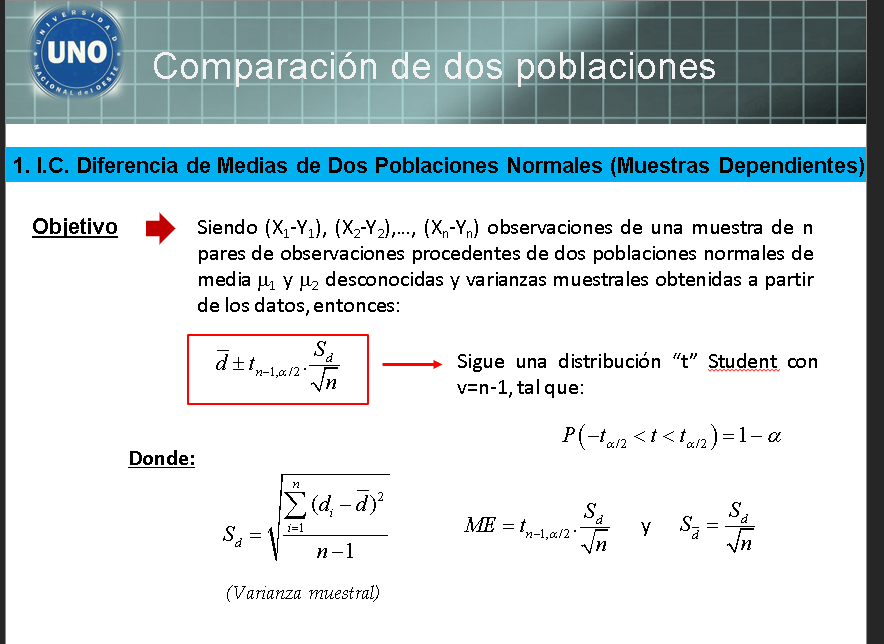

In [14]:
df

,Medicamento X,Medicamento Y,d
PAR,,,
1,29,26.0,3.0
2,32,27.0,5.0
3,31,28.0,3.0
4,32,27.0,5.0
5,30,NaN,NaN
6,32,30.0,2.0
7,29,26.0,3.0
8,31,33.0,-2.0
9,30,36.0,-6.0


#### calculamos la amplitud
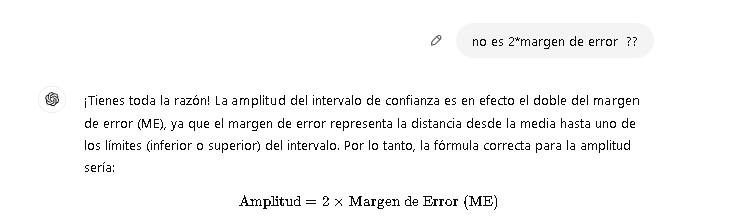


# FUNCION: _1IC_comp_poblac

# diferencias_de_medias_para_observaciones_pareadas # Caso 1 # clase 8

# 1. I.C. Diferencia de Medias de Dos Poblaciones Normales (Muestras Dependientes)

In [15]:
from scipy.stats import t
import math as m

def _1IC_comp_poblac(PORCENTAJE_nivel_de_significancia, df):
    """ DATOS : df de pandas
        EJEMPLO DE USO: _1IC_comp_poblac(1, df)    ->>   siendo 1 el nivel de significancia que se calculara como 1/100 = 0.01
    
        CALCULO FUNDAMENTAL: Comienza RESTANDO la   1)columna   de la   2)columna
        SE IGNORA los valores "nan" en la cuenta de "n"
        
    > 1. I.C. Diferencia de Medias de Dos Poblaciones Normales (Muestras Dependientes)
    >> diferencias_de_medias_para_observaciones_pareadas # Caso 1 # clase 8

    Args:
        PORCENTAJE_nivel_de_significancia (int): ej. pones 1 si tu nivel de significancia es del 1% dado un intervalor de confianza del 99%
        df (pandas dataframe): el df. que  te sugiere tu consigna
    """
    # diferencias_de_medias_para_observaciones_pareadas # Caso 1 # clase 8
    print(" \n >> COMPARACIONES POBLACIONALES")
    print("# diferencias_de_medias_para_observaciones_pareadas # Caso 1 # clase 8")
    print("-- --"*20)
    print(" PORCENTAJE_nivel_de_significancia:  pones solo el porcentage ej. 1 (%) y no por tanto el 0.01 correspondiente, que Viene de un nivel de confianza del 99%")
    print(" ")
    print(" NOTA0: SE calculan las diferencias primero y luego lo demas")
    print(" NOTA1: en caso de que falta un valor se excluye de los 'n'")
    print(" ")
    print("         SIENDO  'd' : diferencia de pares")
    print("-- --"*20)
    
    df["d"] = df[df.columns[0]] - df[df.columns[1]] # ANTES. SIN PASARLO A ABSOLUTO (O SEA A POSITIVO)

    # Mostrar el DataFrame
    print(" ")
    print(df)
    print(" ")

    print("-- --"*20)
    # de las diferencais ...
    print(" \n--  De las diferencias ...  -- \n ")
    print("[d barra]   mean: ",df["d"].mean())
    # print("[Sd]        std: ",df["d"].std())
    print("[Sd]        std: ",df["d"].std(ddof = 1))
    # print("[Sd**2]     var: ",df["d"].var())
    print("[Sd]        std: ",df["d"].var(ddof = 1)) # restamos uno al denominador
    # 
    alpha = PORCENTAJE_nivel_de_significancia/100 # alpha para el intervalo
    n = df.d.count()
    print("alpha: ", alpha)
    alpha_sobre_dos = alpha/2
    print("alpha_sobre_dos: ", alpha_sobre_dos)
    print("n: ", n)
    
    v = n - 1

    # t(alpha/2) para una cola
    t_alpha_2 = t.ppf(1 - alpha/2, v)

    print(f"t({alpha_sobre_dos});(v={v}); = {t_alpha_2:.4f}") # perfecto
    
    # ME: margen de error
    print(" ")
    ME = t_alpha_2*(df["d"].std()/(m.sqrt(n)))
    print("ME: ", ME)
    print(f"Amplitud = |ME*2| = {ME} * 2 = ", abs(ME*2))
    print(" ")
    print("-- --"*20)
    # calculamos los limites
    LCI = df["d"].mean() - ME
    LCS =df["d"].mean() + ME
    print(f"\nLCI = {df["d"].mean()} - {ME} = ", LCI)
    print(f"LCS =  {df["d"].mean()} + {ME} = ", LCS)
    print(" ")
    print(f"resultado final ----> intervalo de confianza al {(1-alpha)*100}% ---->   ( {LCI} ; {LCS} )")

    # ahora tnemos que calcular 
_1IC_comp_poblac(1, df)


 
 >> COMPARACIONES POBLACIONALES
# diferencias_de_medias_para_observaciones_pareadas # Caso 1 # clase 8
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 PORCENTAJE_nivel_de_significancia:  pones solo el porcentage ej. 1 (%) y no por tanto el 0.01 correspondiente, que Viene de un nivel de confianza del 99%
 
 NOTA0: SE calculan las diferencias primero y luego lo demas
 NOTA1: en caso de que falta un valor se excluye de los 'n'
 
         SIENDO  'd' : diferencia de pares
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 
     Medicamento X  Medicamento Y    d
PAR                                   
1               29           26.0  3.0
2               32           27.0  5.0
3               31           28.0  3.0
4               32           27.0  5.0
5               30            NaN  NaN
6               32           30.0  2.0
7               29           26.0  3.0
8               3

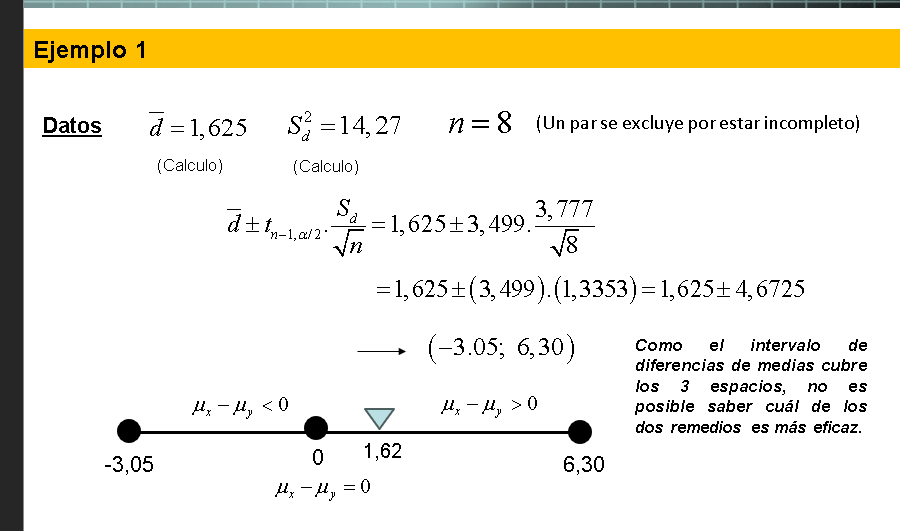

por lo tanto esta correcto // 

### CHEQUEADO CON LO DEL PROFE

# INTERPRETACIoN -> FUNDAMENTAL

----

## interpretacion del ejemplo ? a que se refiere con que ... FUNDAMENTAL

"como el intervalo de difrerencias de medias cubre los 3 espaciones, no es posible saber cualde los dos remedios es mas eficaz"


La interpretación del profesor se basa en el resultado del intervalo de confianza obtenido, que es:

\[
\text{IC} = (-3.048, 6.298)
\]

Dado que el intervalo de confianza incluye el valor 0, significa que no hay evidencia estadísticamente significativa de que haya una diferencia en la eficacia entre los dos medicamentos con el nivel de confianza del 99%. En otras palabras:

- Si el intervalo incluye el 0, esto implica que la diferencia entre los medicamentos podría ser positiva, negativa, o nula. Por lo tanto, no se puede afirmar que uno de los medicamentos sea más eficaz que el otro, ya que el intervalo de confianza cubre tanto valores negativos (indicando que el medicamento \( Y \) podría ser más eficaz) como positivos (indicando que el medicamento \( X \) podría ser más eficaz).

Así, la conclusión del profesor al decir *"Como el intervalo de diferencias de medias cubre los 3 espacios, no es posible saber cuál de los dos remedios es más eficaz"* se refiere a la incertidumbre en los resultados: el intervalo sugiere que no hay una diferencia clara y significativa en la eficacia entre los dos medicamentos bajo el nivel de confianza elegido.

----

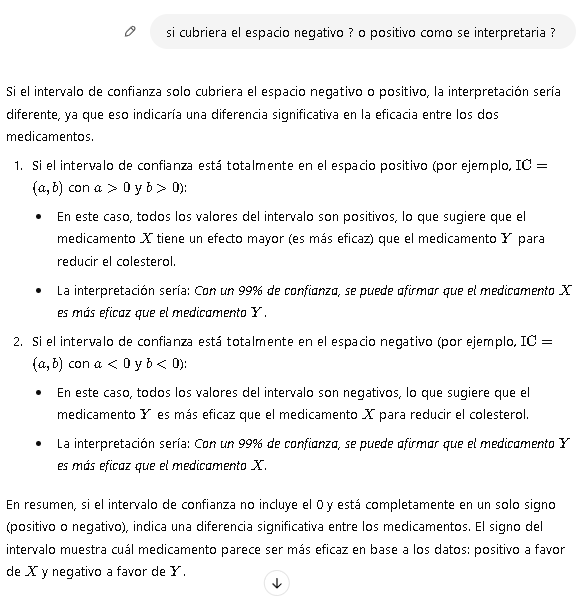

-----

## COMO DETERMINAMOS X e Y ? ej. para ver quien gana en el campo de los itnervalos positivos > 0  o intervalos negativos < 0 (que excluyen al cero)

como determinas "X" o "Y" en estos espaciones como sabes a cual espacio le corresponde cual medicamento  ?

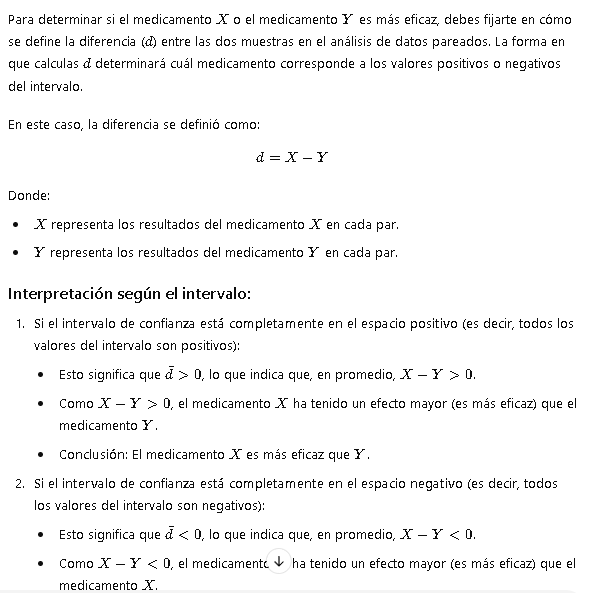

lo que no se ve al final, es que si se diese el caso. significaria que el medicamento Y es mas eficaz, dado que la mayoria de las 
diferencias serian negativas (por lo tanto Y tendria valores de puntaje mayores)


In [16]:
#import pandas as pd

# Crear el DataFrame con los datos de la tabla # DATA FRAME ORIGINAL: CONCLUSION --> NO TENGO PORQUE PONERLE EL 'PAR'
data = {
    'Medicamento X': [29, 32, 31, 32, 30, 32, 29, 31, 30],
    'Medicamento Y': [26, 27, 28, 27, None, 30, 26, 33, 36]  # None representa el valor faltante
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Establecer la columna 'PAR' como índice
# df.set_index('PAR', inplace=True)

# Mostrar el DataFrame
print(df)
#

   Medicamento X  Medicamento Y
0             29           26.0
1             32           27.0
2             31           28.0
3             32           27.0
4             30            NaN
5             32           30.0
6             29           26.0
7             31           33.0
8             30           36.0


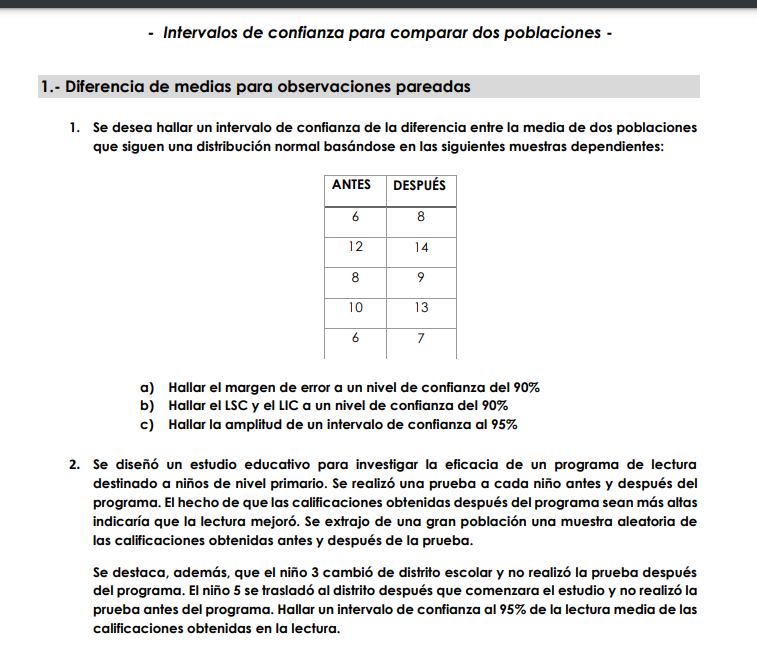

# Ejercicio numero 1

In [17]:
data1 = {
    'ANTES': [6,12,8,10,6],
    'DESPUES': [8,14,9,13,7]  # None representa el valor faltante
}

# Crear el DataFrame
df1 = pd.DataFrame(data1)

print("CALCULAR : a) ME b) LCI y LCS de nivel de confianza del 90%")
display(_1IC_comp_poblac(10, df1)) # nivel de confianza del 90%, por tanto nivel de significancia del 10%
print("-======="*30)
print("-======="*30)
print("c) AMPLITUD. Segun un nivel de confianza del 95% ")
display(_1IC_comp_poblac(5, df1)) # VEMOS QUE LLE INTERVALO FUE NEGATIVO ESTO PORQ HICIMOS ANTES - DESPUES Y SIGNIFICA QUE DESPUES SON VALORES MAYORES POR LO TANTO vemos un incremento general, una diferencia de esta muestra, un incremento general va

CALCULAR : a) ME b) LCI y LCS de nivel de confianza del 90%
 
 >> COMPARACIONES POBLACIONALES
# diferencias_de_medias_para_observaciones_pareadas # Caso 1 # clase 8
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 PORCENTAJE_nivel_de_significancia:  pones solo el porcentage ej. 1 (%) y no por tanto el 0.01 correspondiente, que Viene de un nivel de confianza del 99%
 
 NOTA0: SE calculan las diferencias primero y luego lo demas
 NOTA1: en caso de que falta un valor se excluye de los 'n'
 
         SIENDO  'd' : diferencia de pares
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 
   ANTES  DESPUES  d
0      6        8 -2
1     12       14 -2
2      8        9 -1
3     10       13 -3
4      6        7 -1
 
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 
--  De las diferencias ...  -- 
 
[d barra]   mean:  -1.8
[Sd]        std:  0

None

-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======
-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======
c) AMPLITUD. Segun un nivel de confianza del 95% 
 
 >> COMPARACIONES POBLACIONALES
# diferencias_de_medias_para_observaciones_pareadas # Caso 1 # clase 8
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 PORCENTAJE_nivel_de_significancia:  pones solo el porcentage ej. 1 (%) y no por tanto el 0.01 correspondiente, que Viene de un nivel de confianza del 99%
 
 NOTA0: SE calculan las diferencias primero y luego lo demas
 NOTA1: en caso de que falta un valor se exc

None

In [18]:
# TENEMOS QUE VER SI HACEMOS. DESPUES - ANTES.
# O SI HACEMOS. ANTES MENOS DDESPUES COMO EL QUE HICIMOS ARRIBA

#ACA HACEMOS DESPUES - ANTES en el ejercicio 1. por una cuestion de sentido comun

data1 = {
    'DESPUES': [8,14,9,13,7],  # None representa el valor faltante
    'ANTES': [6,12,8,10,6]
}

# Crear el DataFrame
df1 = pd.DataFrame(data1)

print("CALCULAR : a) ME b) LCI y LCS de nivel de confianza del 90%")
display(_1IC_comp_poblac(10, df1)) # nivel de confianza del 90%, por tanto nivel de significancia del 10%
print("-======="*30)
print("-======="*30)
print("c) AMPLITUD. segun un nivel de confianza del 95% ")
display(_1IC_comp_poblac(5, df1))



CALCULAR : a) ME b) LCI y LCS de nivel de confianza del 90%
 
 >> COMPARACIONES POBLACIONALES
# diferencias_de_medias_para_observaciones_pareadas # Caso 1 # clase 8
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 PORCENTAJE_nivel_de_significancia:  pones solo el porcentage ej. 1 (%) y no por tanto el 0.01 correspondiente, que Viene de un nivel de confianza del 99%
 
 NOTA0: SE calculan las diferencias primero y luego lo demas
 NOTA1: en caso de que falta un valor se excluye de los 'n'
 
         SIENDO  'd' : diferencia de pares
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 
   DESPUES  ANTES  d
0        8      6  2
1       14     12  2
2        9      8  1
3       13     10  3
4        7      6  1
 
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 
--  De las diferencias ...  -- 
 
[d barra]   mean:  1.8
[Sd]        std:  0.

None

-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======
-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======
c) AMPLITUD. segun un nivel de confianza del 95% 
 
 >> COMPARACIONES POBLACIONALES
# diferencias_de_medias_para_observaciones_pareadas # Caso 1 # clase 8
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 PORCENTAJE_nivel_de_significancia:  pones solo el porcentage ej. 1 (%) y no por tanto el 0.01 correspondiente, que Viene de un nivel de confianza del 99%
 
 NOTA0: SE calculan las diferencias primero y luego lo demas
 NOTA1: en caso de que falta un valor se exc

None

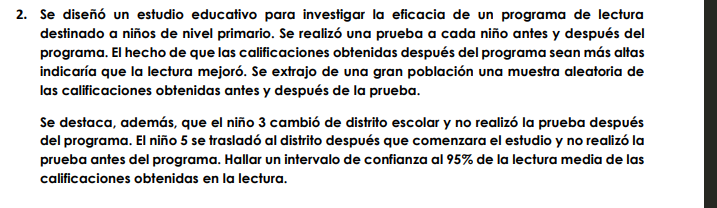

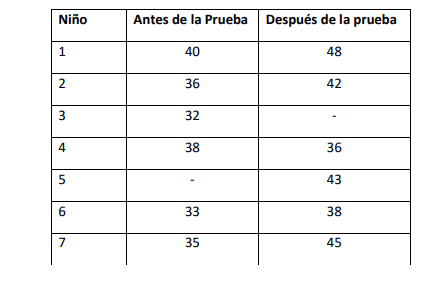

In [19]:
data2 = {
    'DESPUES de la prueba': [48,42,None,36,43,38,45], # CAMBIAMOS EL ORDEN, LA PASAMOS ARRIBA
    'ANTES de la prueba': [40,36,32,38,None,33,35]  # None representa el valor faltante
} # ahora n seria el total menos lo que corresponde, como tennemos dos valores faltantes, sus diferencias tambien seran NaN y por tanto "pd" con counts te deberia de dat 7-2=5.

# Crear el DataFrame
df2 = pd.DataFrame(data2)

print("-======="*30)
print("2). Hallar un intervalo de confianza al 95% de la lectura media de las calificaciones obtenidas en la lectura.")
display(_1IC_comp_poblac(5, df2)) # nivel de confianza del 90%, por tanto nivel de significancia del 10%
print("-======="*30)

-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======
2). Hallar un intervalo de confianza al 95% de la lectura media de las calificaciones obtenidas en la lectura.
 
 >> COMPARACIONES POBLACIONALES
# diferencias_de_medias_para_observaciones_pareadas # Caso 1 # clase 8
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 PORCENTAJE_nivel_de_significancia:  pones solo el porcentage ej. 1 (%) y no por tanto el 0.01 correspondiente, que Viene de un nivel de confianza del 99%
 
 NOTA0: SE calculan las diferencias primero y luego lo demas
 NOTA1: en caso de que falta un valor se excluye de los 'n'
 
         SIENDO  'd' : diferencia de pares
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 
   DESPUES de la

None

-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======


##### entonces  ojo la diferencia que hagas depende del enunciado. si te piden "de un proceso industrial" o si te piden despues/antes
##### la amplitud simepre es positiva


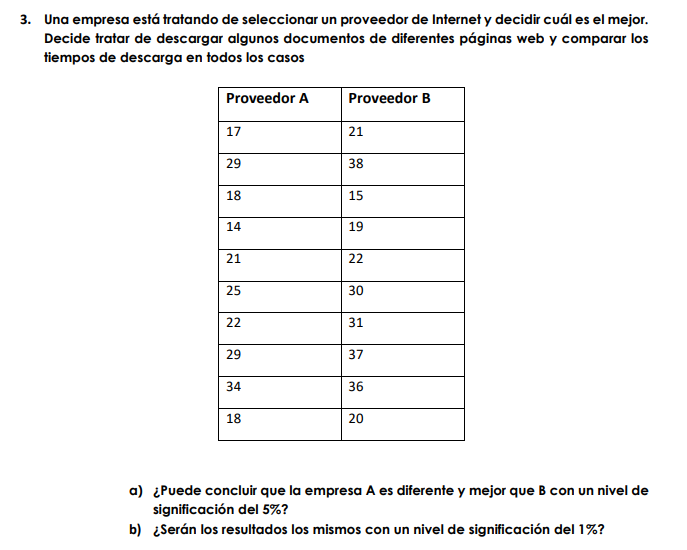

In [20]:
# EJERCICIO 3 

# aca no se como determinar si la empresa A es diferente y mejor que B
data3 = {
    'PROVEDOR A': [17,29,18,14,21,25,22,29,34,18], # CAMBIAMOS EL ORDEN, LA PASAMOS ARRIBA
    'PROVEDOR B': [21,38,15,19,22,30,31,37,36,20]  # None representa el valor faltante
} # ahora n seria el total menos lo que corresponde, como tennemos dos valores faltantes, sus diferencias tambien seran NaN y por tanto "pd" con counts te deberia de dat 7-2=5.

# Crear el DataFrame
df3 = pd.DataFrame(data3)

print("-======="*30)
print("3). a) nivel de significancia del 5%")
display(_1IC_comp_poblac(5, df3)) 
print("-======="*30)
print(" 3) b) seran los resultados losmismos con un nivel de significacion del 1%") 
display(_1IC_comp_poblac(1, df3)) 

-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======
3). a) nivel de significancia del 5%
 
 >> COMPARACIONES POBLACIONALES
# diferencias_de_medias_para_observaciones_pareadas # Caso 1 # clase 8
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 PORCENTAJE_nivel_de_significancia:  pones solo el porcentage ej. 1 (%) y no por tanto el 0.01 correspondiente, que Viene de un nivel de confianza del 99%
 
 NOTA0: SE calculan las diferencias primero y luego lo demas
 NOTA1: en caso de que falta un valor se excluye de los 'n'
 
         SIENDO  'd' : diferencia de pares
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 
   PROVEDOR A  PROVEDOR B  d
0          17          21 -4
1          29          38 -9
2  

None

-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======-=======
 3) b) seran los resultados losmismos con un nivel de significacion del 1%
 
 >> COMPARACIONES POBLACIONALES
# diferencias_de_medias_para_observaciones_pareadas # Caso 1 # clase 8
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 PORCENTAJE_nivel_de_significancia:  pones solo el porcentage ej. 1 (%) y no por tanto el 0.01 correspondiente, que Viene de un nivel de confianza del 99%
 
 NOTA0: SE calculan las diferencias primero y luego lo demas
 NOTA1: en caso de que falta un valor se excluye de los 'n'
 
         SIENDO  'd' : diferencia de pares
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
 
   PROVEDOR A  PROVEDOR B  d
0          17          

None

### INTERPRETACIONES punto 3

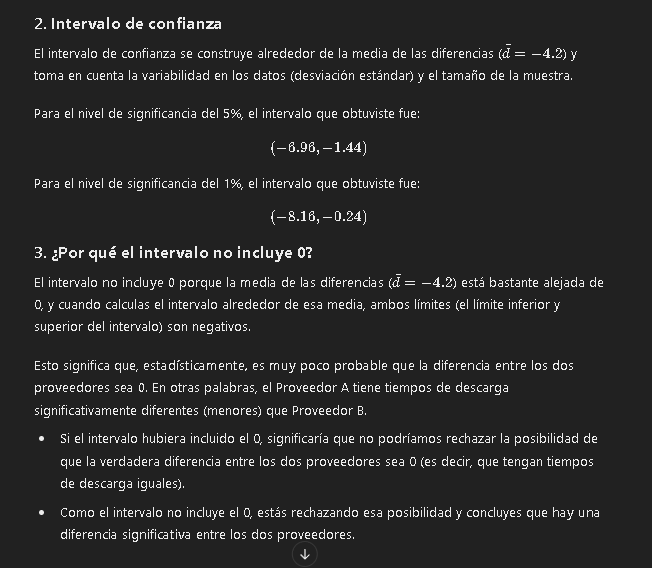

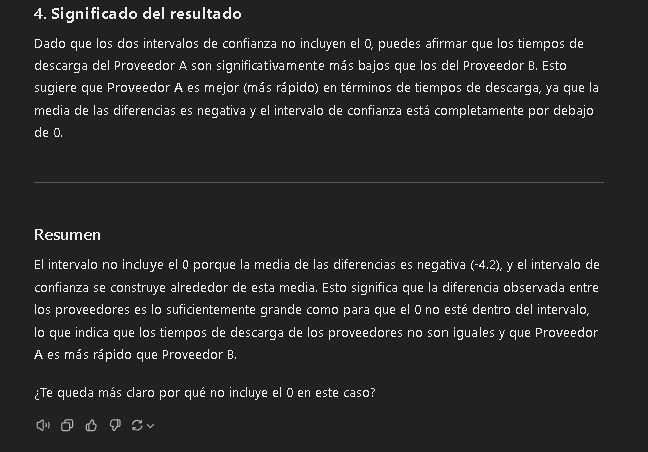


##### clave clave mal

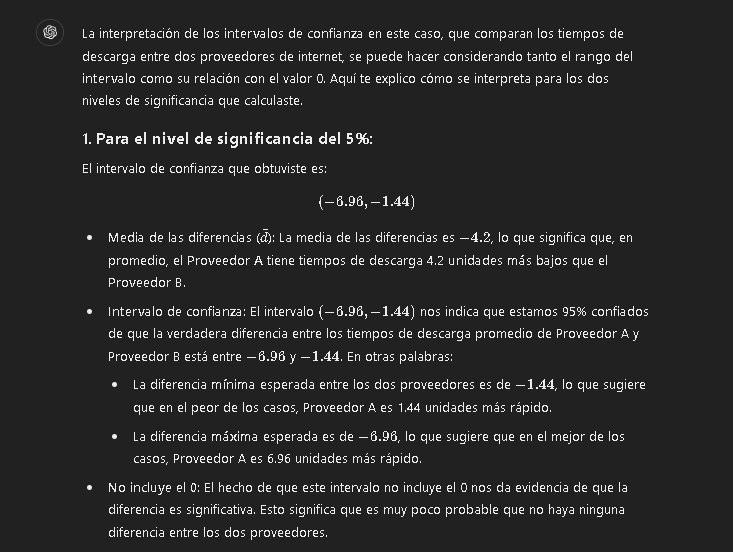

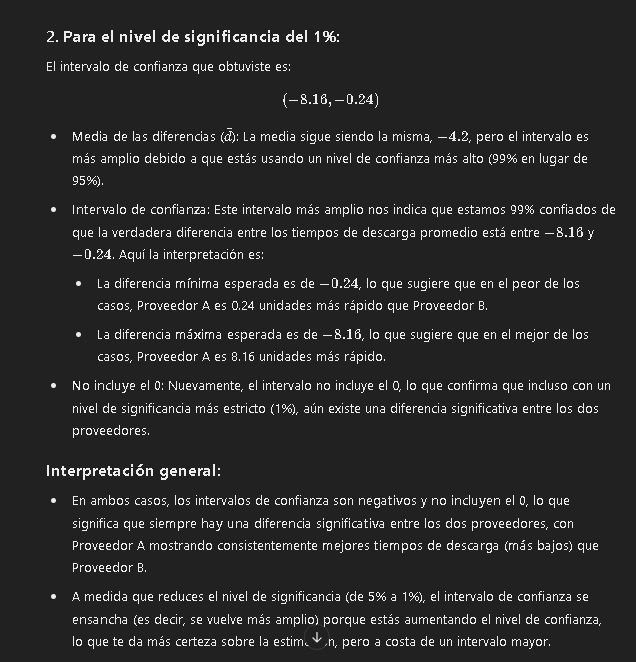


# 2. I.C. Diferencia de Medias con varianzas conocidas (Muestras Independientes)

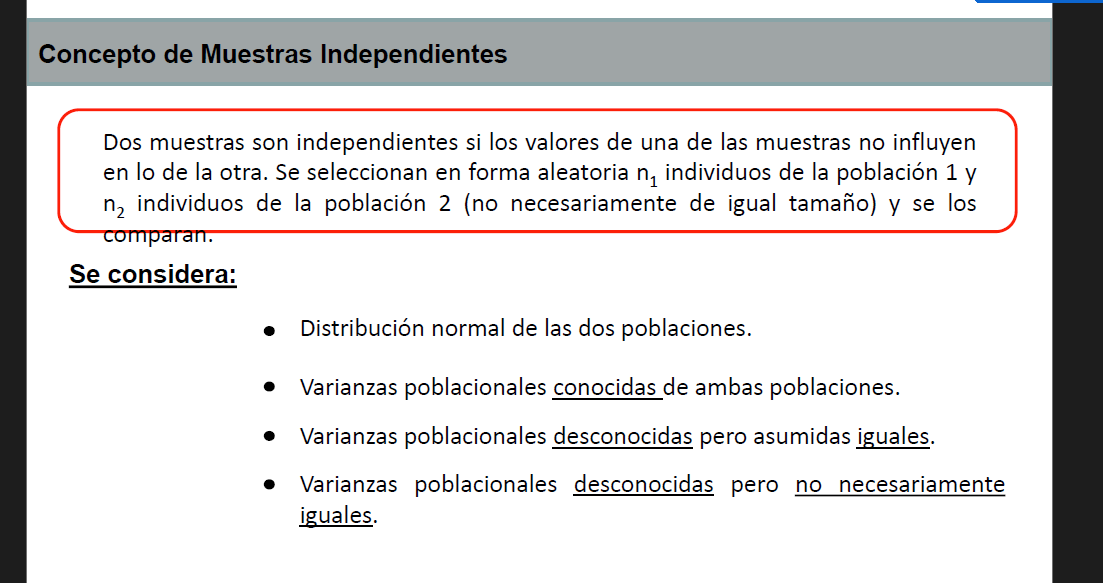

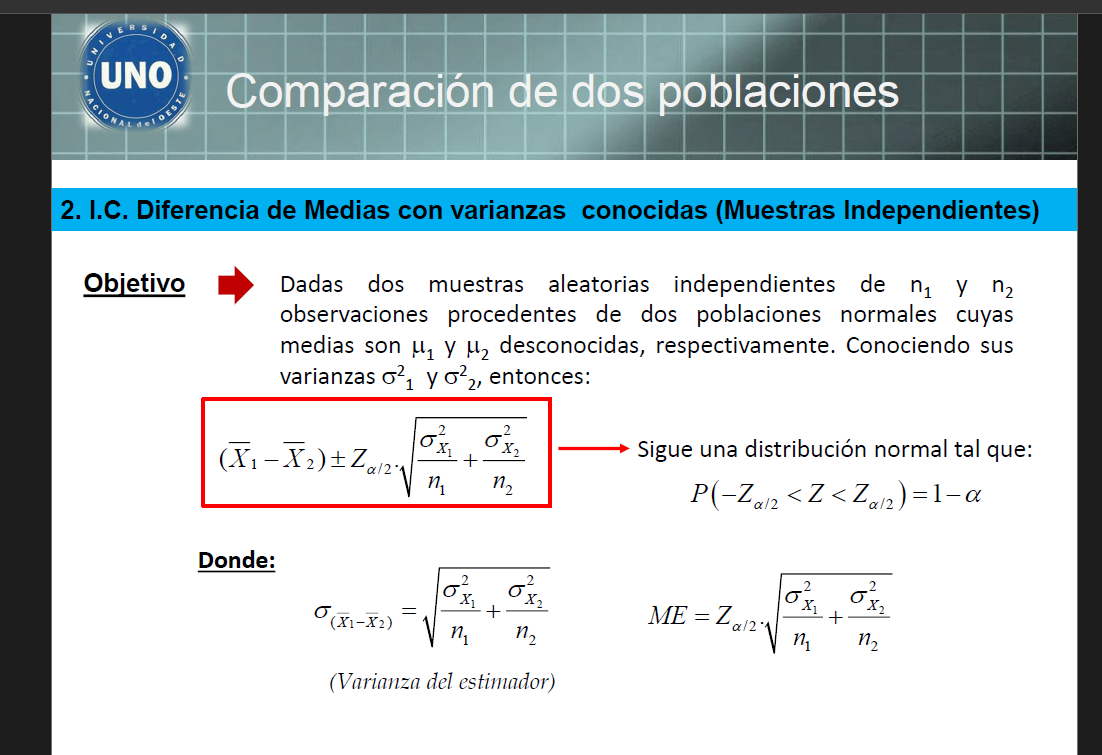

In [21]:
# calculamos z alpha sobre dos

from scipy.stats import norm
from scipy.stats import t

# Nivel de significancia
alpha = 0.05  # Para un nivel de confianza del 95%

# Z(alpha/2)
z_alpha_2 = norm.ppf(1 - alpha/2)

print(f"Z(alpha/2) = {z_alpha_2:.4f}")


Z(alpha/2) = 1.9600



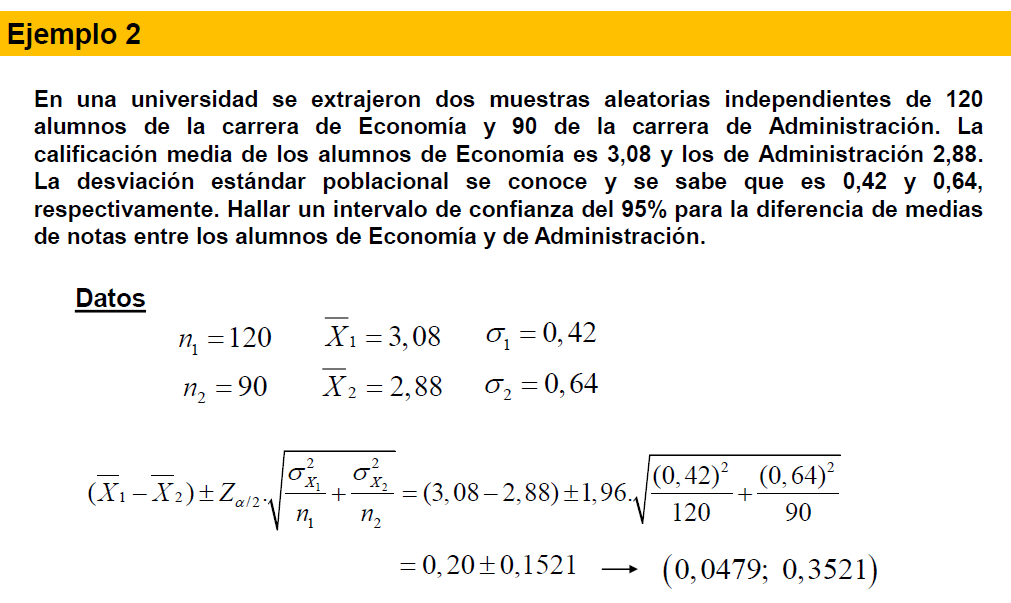

## funcion - 2. IC -> Diferencia de Medias con varianzas conocidas (Muestras Independientes)

In [22]:

from scipy.stats import norm
from scipy.stats import t
import math as m

# # Nivel de significancia
# alpha = 0.05  # Para un nivel de confianza del 95%

# # Z(alpha/2)
# z_alpha_2 = norm.ppf(1 - alpha/2)

# print(f"Z(alpha/2) = {z_alpha_2:.4f}")

def _2IC_comp_poblac(n1,n2,X1_barra, X2_barra, desviacion1_poblacional,desviacion2_poblacional,PORCENTAGE_nivel_de_significancia):
    """ EJEMPLO DE USO: display(_2IC_comp_poblac(120,90,3.08,2.88, 0.42, 0.64, 5)) # VEMOS QUE ESTA BIEN
        
    Diferencia de Medias con varianzas conocidas (Muestras Independientes). caso 2

    Args:
        n1 (int): tamaño de muestra1
        n2 (int): tamaño de muestra2
        X1_barra (float): media muestral 1
        X2_barra (float): media muestral 2
        desviacion1_poblacional(float): desviacion estandar poblacional
        desviacion2_poblacional (float): desviacion1 estandar poblacional
    """
    print("Diferencia de Medias con varianzas conocidas (Muestras Independientes). caso 2")
    print(" ")
    print("-- --"*20)
    alpha = PORCENTAGE_nivel_de_significancia/100
    print("alpha: ", alpha)
    alpha_sobre_dos = alpha/2
    print(f"alpha_sobre_dos =  {alpha}/2  = ", alpha_sobre_dos)
    
    # Z(alpha/2)
    z_alpha_2 = norm.ppf(1 - alpha_sobre_dos)
    print(f"\nZ({alpha/2}) = {z_alpha_2:.4f}")
    
    ME = z_alpha_2*m.sqrt((((desviacion1_poblacional**2)/n1)+((desviacion2_poblacional**2)/n2)))
    
    print(f"\nME = {z_alpha_2}*{m.sqrt((((desviacion1_poblacional**2)/n1)+((desviacion2_poblacional**2)/n2)))} =  ", ME)
    print(f"Amplitud = |{ME} * 2| = ", abs(ME*2))
    
    print(f"\n(X1_barra - X2_barra)  = ({X1_barra}-{X2_barra}) =  ", (X1_barra - X2_barra))
    
    LCI = (X1_barra - X2_barra) - ME
    LCS = (X1_barra - X2_barra) + ME
    
    print(f"\nLCI = ({X1_barra}-{X2_barra}) - {ME} = ", LCI)
    print(f"LCS = ({X1_barra}-{X2_barra}) + {ME} = ", LCS)

    print("-- --"*20)
    print(f"\n\n Resultado: --> intervalo de confianza al {(1-alpha)*100}%  --> ( {LCI} ; {LCS} )\n\n\n")
    
#print("-- --"*20)
display(_2IC_comp_poblac(120,90,3.08,2.88, 0.42, 0.64, 5)) # VEMOS QUE ESTA BIEN

Diferencia de Medias con varianzas conocidas (Muestras Independientes). caso 2
 
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
alpha:  0.05
alpha_sobre_dos =  0.05/2  =  0.025

Z(0.025) = 1.9600

ME = 1.959963984540054*0.07759581890225214 =   0.15208501039930655
Amplitud = |0.15208501039930655 * 2| =  0.3041700207986131

(X1_barra - X2_barra)  = (3.08-2.88) =   0.20000000000000018

LCI = (3.08-2.88) - 0.15208501039930655 =  0.047914989600693625
LCS = (3.08-2.88) + 0.15208501039930655 =  0.35208501039930673
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --


 Resultado: --> intervalo de confianza al 95.0%  --> ( 0.047914989600693625 ; 0.35208501039930673 )





None

# 3. I.C. Diferencia de Medias con varianzas desconocidas (asumidas iguales)

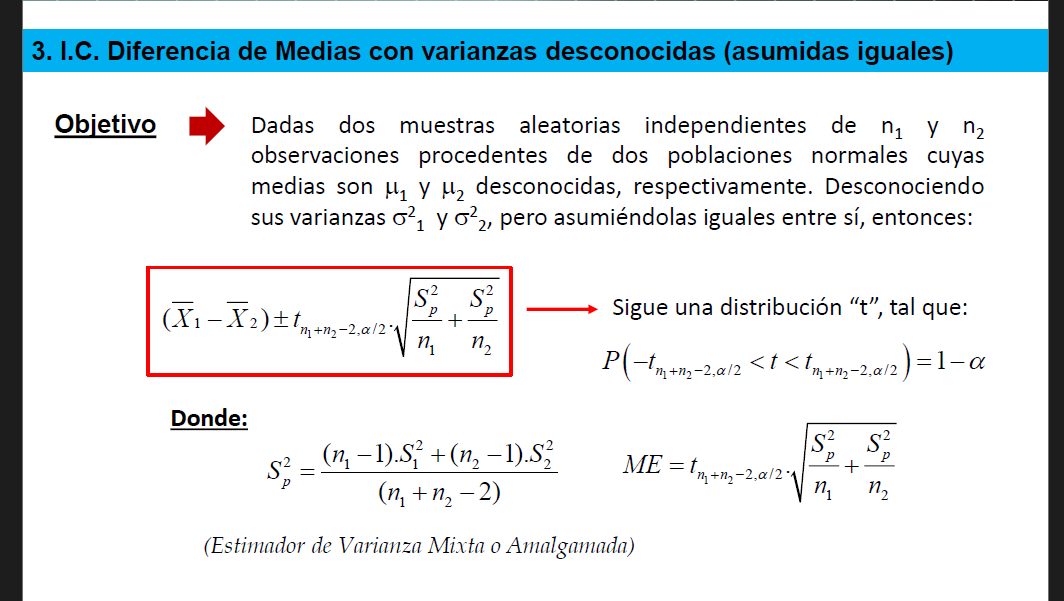

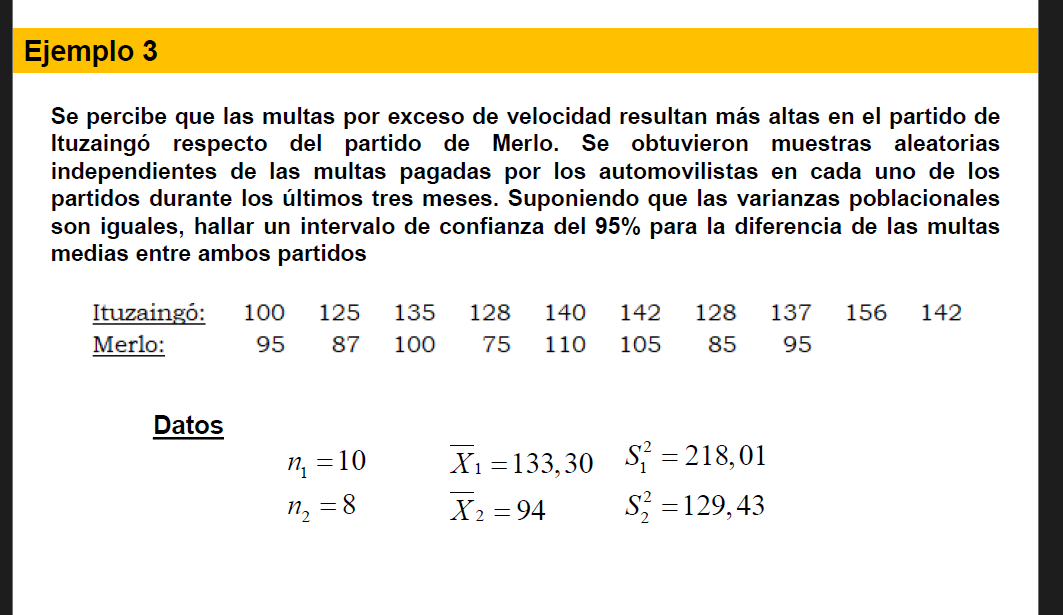

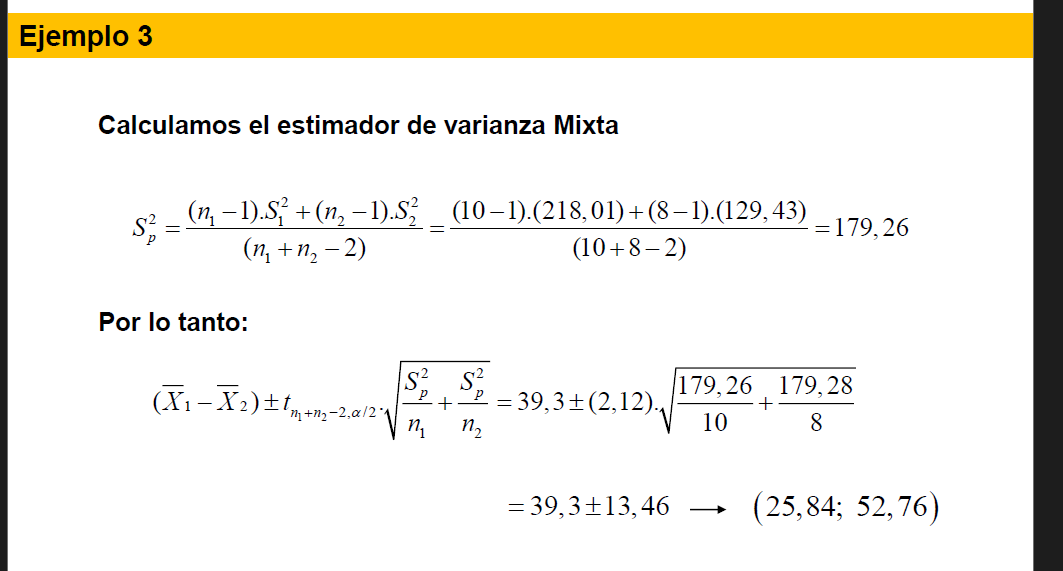

In [23]:
# calculamos z alpha sobre dos

from scipy.stats import norm
from scipy.stats import t

# Nivel de significancia
alpha = 0.05  # Para un nivel de confianza del 95%

v = 8-1
# Z(alpha/2)
t_alpha_2 = t.ppf(1 - alpha/2, v)

print(f"t_alpha_2 = {t_alpha_2:.4f}")


t_alpha_2 = 2.3646


## funcion

In [24]:
import pandas as pd
import math as m
from scipy.stats import t

data = {
    'ITUZAINGO': [100,125,135,128,140,142,128,137,156,142],
    'MERLO': [95,87,100,75,110,105,85,95,None,None]  # None representa el valor faltante
}

df4 = pd.DataFrame(data)
display(df4)

# suponiendo X1 es ituzaingo
X1_barra = df4.ITUZAINGO.mean()
X2_barra = df4.MERLO.mean()

n1 = df4.ITUZAINGO.count()
n2 = df4.MERLO.count()

var1 = df4.ITUZAINGO.var()
var2 = df4.MERLO.var()

std1 = m.sqrt(var1)
std2 = m.sqrt(var2)

def _3IC_comp_poblac(n1,n2,X1_barra, X2_barra, desviacion1_muestral,desviacion2_muestral,PORCENTAGE_nivel_de_significancia):
    """EJEPMLO DE USO :   _3IC_comp_poblac(n1,n2,X1_barra,X2_barra, std1,std2, 5)
    
    3. I.C. Diferencia de Medias con varianzas desconocidas (asumidas iguales). caso 3 

    Args:
        n1 (int): tamaño de muestra1
        n2 (int): tamaño de muestra2
        X1_barra (float): media muestral 1
        X2_barra (float): media muestral 2
        desviacion1_muestral(float): desviacion estandar poblacional
        desviacion2_muestral (float): desviacion1 estandar poblacional
    """
    print("3. I.C. Diferencia de Medias con varianzas desconocidas (asumidas iguales)")
    print("-- --"*10)
    
    var1_muestral = desviacion1_muestral**2
    print("\nvar1_muestral (S2_1): ", var1_muestral)
    var2_muestral = desviacion2_muestral**2
    print("var2_muestral (S2_2): ", var2_muestral)
    
    alpha = PORCENTAGE_nivel_de_significancia/100
    print("alpha: ", alpha)
    alpha_sobre_dos = alpha/2
    print(f"alpha_sobre_dos = alpha/2 = ", alpha_sobre_dos)
    
    v = n1 + n2 - 2
    print("(v = n1 + n2 - 2) = ", v)

    print("-- --"*10)
    # t(alpha/2)
    t_alpha_2 = t.ppf(1 - alpha_sobre_dos, v)
    print(f"\nt_alpha_2 = t({alpha/2};v={v}) = {t_alpha_2:.4f}")
    
    # CALCULAMOS EL ESTIMADOR DE VARIANZA MIXTA
    Sp2 = ((n1-1)*(desviacion1_muestral**2) + (n2-1)*(desviacion2_muestral**2))/v
    print(">>  ESTIMADOR DE VARIANZA MIXTA (Sp2): ", Sp2)
    
    
    ME = t_alpha_2*m.sqrt((((Sp2)/n1)+((Sp2)/n2)))
    
    print(f"ME = {t_alpha_2}*{m.sqrt((((Sp2)/n1)+((Sp2)/n2)))}  = ", ME)
    print(f"Amplitud = |{ME} * 2|  = ", abs(ME*2))
    
    print("(X1_barra - X2_barra)  = ", (X1_barra - X2_barra))
    
    LCI = (X1_barra - X2_barra) - ME
    LCS = (X1_barra - X2_barra) + ME
    
    print(f"LCI = {(X1_barra - X2_barra)} - {ME} = ", LCI)
    print(f"LCS = {(X1_barra - X2_barra)} + {ME} = ", LCS)

    print("-- --"*10)
    print(f"\n\n Resultado: --> intervalo de confianza al {(1-alpha)*100}%--> ( {LCI} ; {LCS} )")
    

# contrastacion con ejemplo
_3IC_comp_poblac(n1,n2,X1_barra,X2_barra, std1,std2, 5)
# VEMOS QUE ESTA PERFECTO

,ITUZAINGO,MERLO
0,100,95.0
1,125,87.0
2,135,100.0
3,128,75.0
4,140,110.0
5,142,105.0
6,128,85.0
7,137,95.0
8,156,NaN
9,142,NaN


3. I.C. Diferencia de Medias con varianzas desconocidas (asumidas iguales)
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --

var1_muestral (S2_1):  218.01111111111106
var2_muestral (S2_2):  129.42857142857142
alpha:  0.05
alpha_sobre_dos = alpha/2 =  0.025
(v = n1 + n2 - 2) =  16
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --

t_alpha_2 = t(0.025;v=16) = 2.1199
>>  ESTIMADOR DE VARIANZA MIXTA (Sp2):  179.25624999999997
ME = 2.1199052992210112*6.350799654374242  =  13.463093841598923
Amplitud = |13.463093841598923 * 2|  =  26.926187683197846
(X1_barra - X2_barra)  =  39.30000000000001
LCI = 39.30000000000001 - 13.463093841598923 =  25.83690615840109
LCS = 39.30000000000001 + 13.463093841598923 =  52.76309384159893
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --


 Resultado: --> intervalo de confianza al 95.0%--> ( 25.83690615840109 ; 52.76309384159893 )


# 4. I.C. Diferencia de Medias con varianzas desconocidas (asumidas distintas)

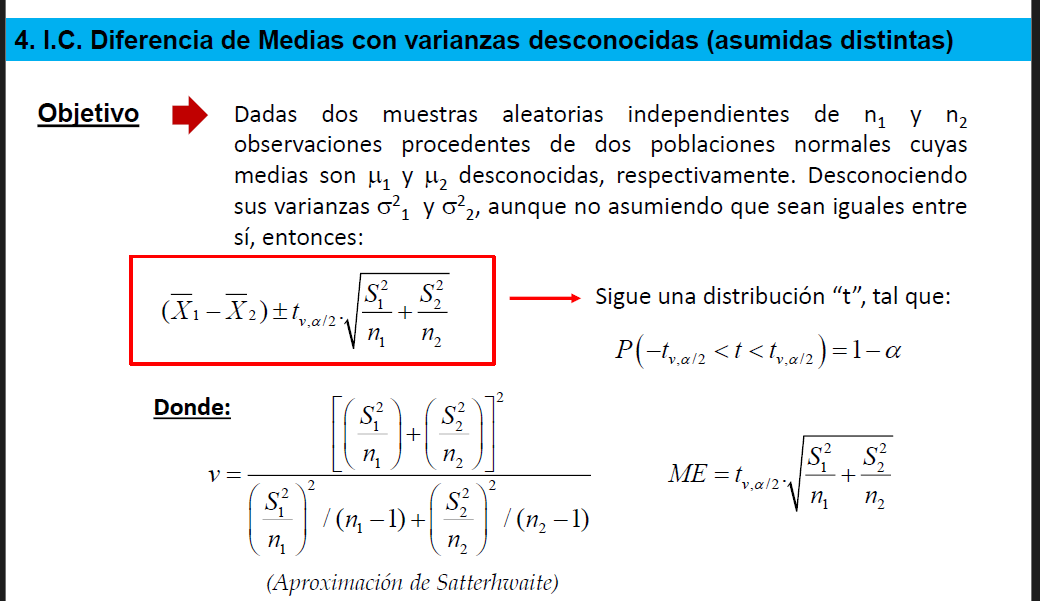

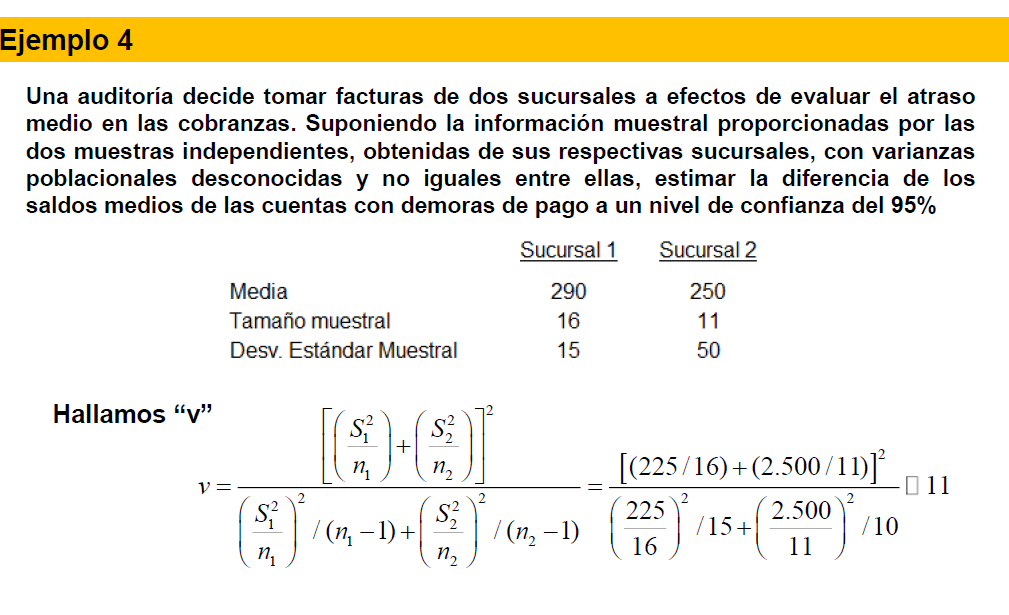

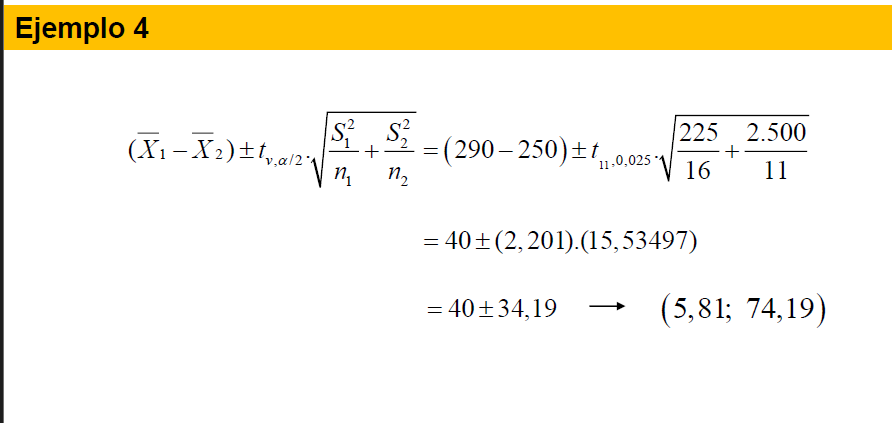

## formulas

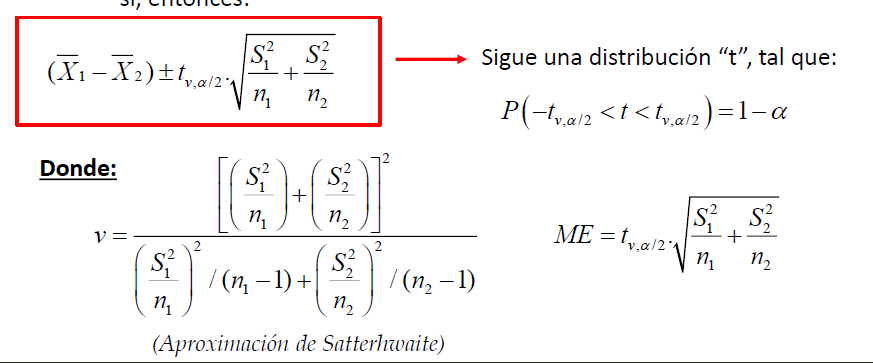

Esta fórmula es útil en pruebas t con varianzas desiguales (prueba t de Welch).

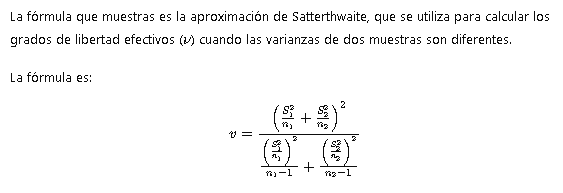

## funcion

In [25]:
# 4. I.C. Diferencia de Medias con varianzas desconocidas (asumidas distintas)
# AHORA CALCULAR LA APROXIMACION DE SATTERHWAITE

def satterthwaite_approx(S1, S2, n1, n2):
    # Calcular el numerador
    numerador = (S1**2 / n1 + S2**2 / n2)**2
    
    # Calcular el denominador
    denominador = ((S1**2 / n1)**2 / (n1 - 1)) + ((S2**2 / n2)**2 / (n2 - 1))
    
    # Grados de libertad aproximados
    v = numerador / denominador
    
    return v

# Ejemplo de uso:
S1 = 15 # Desviación estándar de la primera muestra
S2 = 50  # Desviación estándar de la segunda muestra

n1 = 16   # Tamaño de la primera muestra
n2 = 11   # Tamaño de la segunda muestra

X1_barra = 290
X2_barra = 250

v = satterthwaite_approx(S1, S2, n1, n2)
print(f"Grados de libertad aproximados (v): {v:.4f}") # PERFECTO


def _4IC_comp_poblac(n1,n2,X1_barra, X2_barra, desviacion1_muestral,desviacion2_muestral,PORCENTAGE_nivel_de_significancia):
    """4. I.C. Diferencia de Medias con varianzas desconocidas (asumidas distintas)

    Args:
        n1 (int): tamaño de muestra1
        n2 (int): tamaño de muestra2
        X1_barra (float): media muestral 1
        X2_barra (float): media muestral 2
        desviacion1_muestral(float): desviacion estandar poblacional
        desviacion2_muestral (float): desviacion1 estandar poblacional
    """
    print("4. I.C. Diferencia de Medias con varianzas desconocidas (asumidas distintas)")
    print(" ---  --- " *8)
    
    var1_muestral = desviacion1_muestral**2
    print("var1_muestral (S2_1): ", var1_muestral)
    var2_muestral = desviacion2_muestral**2
    print("var2_muestral (S2_2): ", var2_muestral)
    
    alpha = PORCENTAGE_nivel_de_significancia/100
    print("alpha: ", alpha)
    alpha_sobre_dos = alpha/2
    print("alpha_sobre_dos: ", alpha_sobre_dos)
    
    # CALCULAMOS LA APROXIMACION DE SATTERTHWAITE_APPROX
    v = satterthwaite_approx(desviacion1_muestral, desviacion2_muestral, n1, n2) # el profe redondeo pero se recomienda no redondear 
    print(" ---  --- " *8)
    print("\n >> satterthwaite_approx (v): ", v)
    
    # t(alpha/2)
    t_alpha_2 = t.ppf(1 - alpha_sobre_dos, v)
    print(f"t_alpha_2 =  t(alpha/2={alpha/2};v={v})  =  {t_alpha_2:.4f}")
    
    
    ME = t_alpha_2*m.sqrt((((var1_muestral)/n1)+((var2_muestral)/n2)))
    
    print(f"ME = {t_alpha_2}*{m.sqrt((((var1_muestral)/n1)+((var2_muestral)/n2)))} = ", ME)
    print(f"Amplitud =  |{ME} * 2| = ", abs(ME*2))
    
    print("(X1_barra - X2_barra)  = ", (X1_barra - X2_barra))
    
    LCI = (X1_barra - X2_barra) - ME
    LCS = (X1_barra - X2_barra) + ME
    
    # print("LCI = ", LCI)
    # print("LCS: ", LCS)
    print(f"LCI = {(X1_barra - X2_barra)} - {ME} = ", LCI)
    print(f"LCS = {(X1_barra - X2_barra)} + {ME} = ", LCS)
    
    print("-- --"*10)
    print(f"\n\n Resultado: --> intervalo de confianza al {(1-alpha)*100}%--> ( {LCI} ; {LCS} )")
    

# Ejemplo de uso:
S1 = 15 # Desviación estándar de la primera muestra
S2 = 50  # Desviación estándar de la segunda muestra

n1 = 16   # Tamaño de la primera muestra
n2 = 11   # Tamaño de la segunda muestra

X1_barra = 290
X2_barra = 250

# contrastacion con ejemplo
_4IC_comp_poblac(n1,n2,X1_barra,X2_barra, S1, S2, 5)
# VEMOS QUE ESTA PERFECTO


Grados de libertad aproximados (v): 11.2471
4. I.C. Diferencia de Medias con varianzas desconocidas (asumidas distintas)
 ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  --- 
var1_muestral (S2_1):  225
var2_muestral (S2_2):  2500
alpha:  0.05
alpha_sobre_dos:  0.025
 ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  --- 

 >> satterthwaite_approx (v):  11.24707874510916
t_alpha_2 =  t(alpha/2=0.025;v=11.24707874510916)  =  2.1951
ME = 2.1951002913983726*15.534967887727586 =  34.100812537215184
Amplitud =  |34.100812537215184 * 2| =  68.20162507443037
(X1_barra - X2_barra)  =  40
LCI = 40 - 34.100812537215184 =  5.899187462784816
LCS = 40 + 34.100812537215184 =  74.10081253721518
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --


 Resultado: --> intervalo de confianza al 95.0%--> ( 5.899187462784816 ; 74.10081253721518 )


# 5. I.C. Diferencia de Proporciones Poblacionales (muestras grandes)


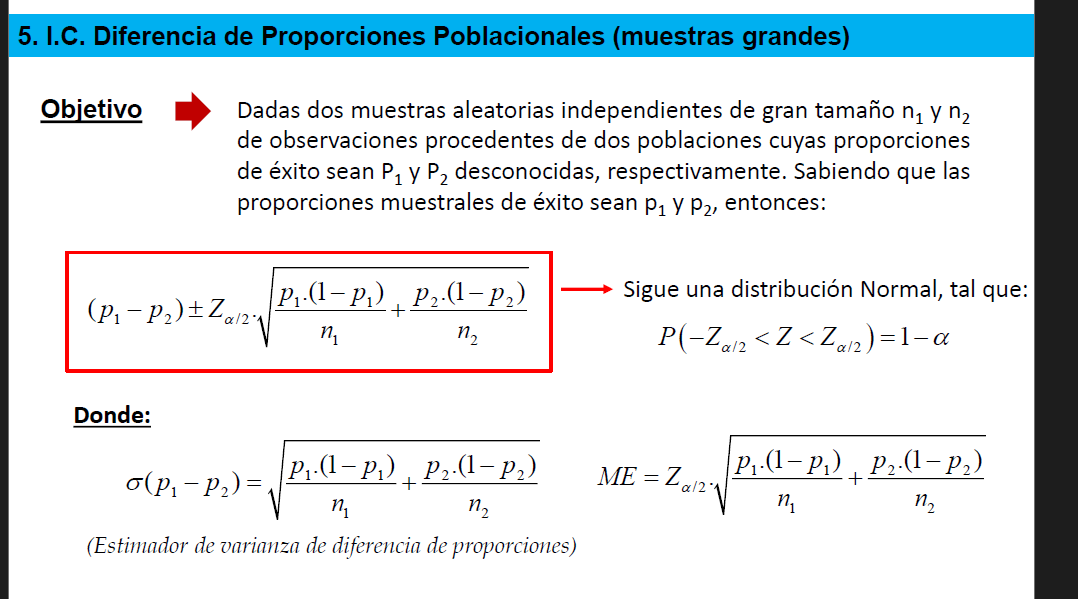

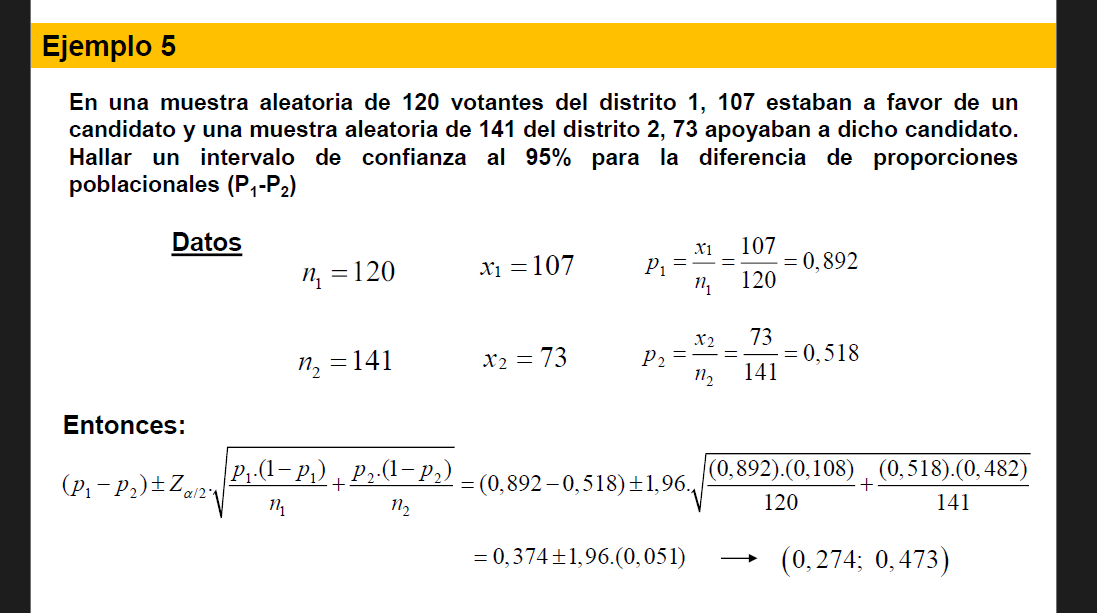



In [26]:
alpha = 0.05
norm.ppf(1 - alpha/2)

np.float64(1.959963984540054)

### funcion 

In [27]:
import math as m
from scipy.stats import norm

def _5IC_comp_poblac(n1,n2,x1,x2, PORCENTAJE_intervalo_de_confianza):
    """5. I.C. Diferencia de Proporciones Poblacionales (muestras grandes)
    Args:
        n1 (num): entero. tamaño de la muestra1
        n2 (num): entero. tamaño de la muestra2
        x1 (num): dicotomica, para calc. proporcion 1
        x2 (num): dicotomica, para calc. proporcion 2 
        PORCENTAJE_intervalo_de_confianza: ej. 5, representaria un 5% de alpha. dado un pedido de intervalo de confianza del 9
    """
    print("5. I.C. Diferencia de Proporciones Poblacionales (muestras grandes)")
    print(" <> <> <>" *7)
    print("datos base: ")
    print(" ")
    p1 =x1/n1
    p2 =x2/n2
    print("x1", x1)
    print("x2", x2)
    print("n1", n1)
    print("n2", n2)
    print("p1 = (x1/n1) :", p1)
    print("p2 = (x2/n2) :", p2)
    print(" ")
    print(" <> <> <>" *7)
    
    print("calculos: ")
    print(" ")
    alpha = PORCENTAJE_intervalo_de_confianza/100
    alpha_sobre_dos = alpha/2
    print("alpha: ",alpha)
    print(f"alpha_sobre_dos: {alpha}/2 = ",alpha_sobre_dos)
    
    print(f"(p1 - p2) = ({p1}-{p2}) = ", p1-p2)
    z_alpha_2 = norm.ppf(1 - alpha_sobre_dos)
    print(f"Z_alpha_2  = Z(alpha/2) ={alpha/2} = ", z_alpha_2)
    
    # CALCULAMOS EL ESTIMADOR DE varianzas de diferencias de proporciones
    # En este caso lo que sería la desv. estandar.
    print("\n \n > CALCULAMOS EL ESTIMADOR DE varianzas de diferencias de proporciones\n")
    std_p1_p2 = m.sqrt(((p1*(1-p1))/n1) + ((p2*(1-p2))/n2))
    print(f">> sigma(1p-p2) = sigma(p1 - p2) = sigma({p1} - {p2})  =", std_p1_p2)
    
    ME = z_alpha_2*std_p1_p2
    print(f"\n\nME = {z_alpha_2}*{std_p1_p2} = ", ME)
    
    LCI = (p1-p2)-ME
    LCS = (p1-p2)+ME
    
    print(f"LCI: (p1-p2)-ME = ({p1} - {p2}) - {ME:.4f}  = {(p1-p2)} - {ME} =", LCI)
    print(f"LCS: (p1-p2)+ME = ({p1} - {p2}) + {ME:.4f}  = {(p1-p2)} + {ME} = ", LCS)
    print(" ")
    # print(f"resultado --> intervalo --> ( {LCI} ; {LCS})")
    print(f"\n\n Resultado: --> intervalo de confianza al {(1-alpha)*100}%--> ( {LCI} ; {LCS} )")
    
_5IC_comp_poblac(120,141,107,73,5)

5. I.C. Diferencia de Proporciones Poblacionales (muestras grandes)
 <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <>
datos base: 
 
x1 107
x2 73
n1 120
n2 141
p1 = (x1/n1) : 0.8916666666666667
p2 = (x2/n2) : 0.5177304964539007
 
 <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <>
calculos: 
 
alpha:  0.05
alpha_sobre_dos: 0.05/2 =  0.025
(p1 - p2) = (0.8916666666666667-0.5177304964539007) =  0.37393617021276604
Z_alpha_2  = Z(alpha/2) =0.025 =  1.959963984540054

 
 > CALCULAMOS EL ESTIMADOR DE varianzas de diferencias de proporciones

>> sigma(1p-p2) = sigma(p1 - p2) = sigma(0.8916666666666667 - 0.5177304964539007)  = 0.05075230949617771


ME = 1.959963984540054*0.05075230949617771 =  0.09947269874473849
LCI: (p1-p2)-ME = (0.8916666666666667 - 0.5177304964539007) - 0.0995  = 0.37393617021276604 - 0.09947269874473849 = 0.2744634714680275
LCS: (p1-p2)+ME = (0.8916666666666667 - 0.5177304964539007) + 0.0995  = 0.37393617021276604 + 0.09947269874473849 =  0.4734

# 6. I.C. para el Cociente de Varianzas (poblaciones normales)

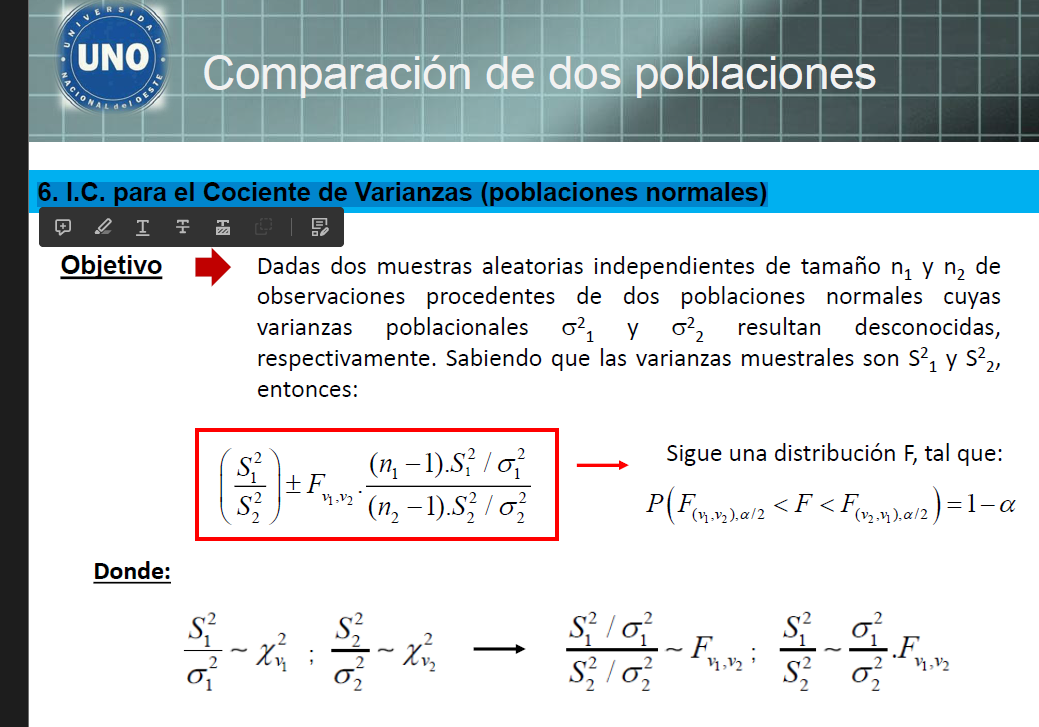

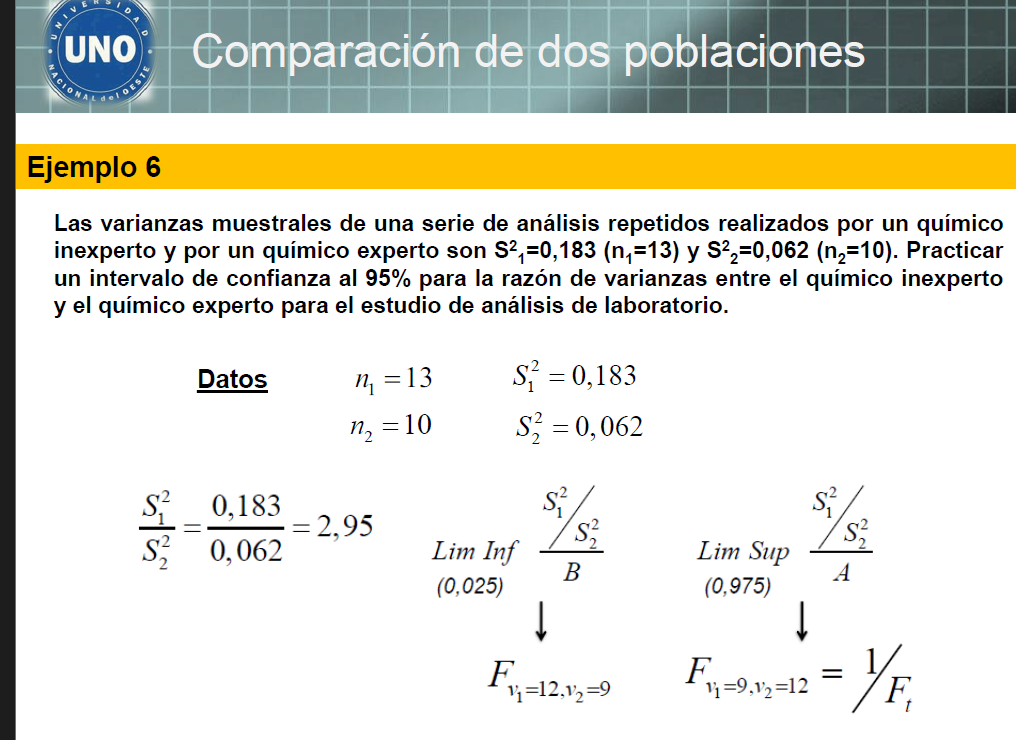

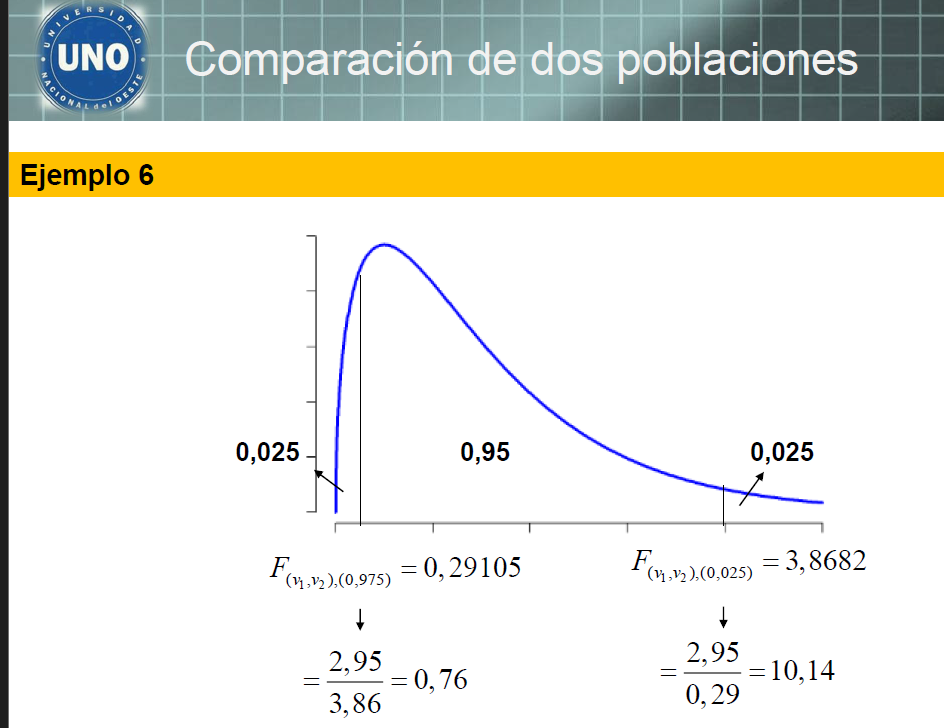

In [28]:
from scipy.stats import f
# en este caso usamos la distribucion de F de scheneider

alpha = 0.05 # nivel de significacion
dof_n = 13-1  # Grados de libertad del numerador
dof_d = 10-1  # Grados de libertad del denominador

valor_critico_f_1 = f.ppf(1 - alpha/2, dof_n, dof_d) # valor critico # tambien conocido cmo F(v1;v2)
valor_critico_f_2 = f.ppf(alpha/2, dof_n, dof_d) # valor critico # tambien conocido cmo F(v1;v2)

print(valor_critico_f_1)
print(valor_critico_f_2)


3.8682203228432703
0.29104916350617555


# de todas  ESTA ULTIMA la IC 6 no se me ocurre como proseguir por ende la dejo ac'a

# Ejercicios. de casos de IC2 en adelante

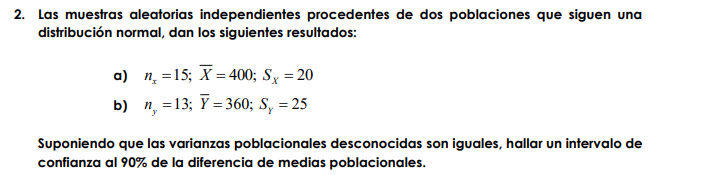

In [29]:
print(" 2) ")
_3IC_comp_poblac(15,13,400,360,20,25,10)

 2) 
3. I.C. Diferencia de Medias con varianzas desconocidas (asumidas iguales)
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --

var1_muestral (S2_1):  400
var2_muestral (S2_2):  625
alpha:  0.1
alpha_sobre_dos = alpha/2 =  0.05
(v = n1 + n2 - 2) =  26
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --

t_alpha_2 = t(0.05;v=26) = 1.7056
>>  ESTIMADOR DE VARIANZA MIXTA (Sp2):  503.84615384615387
ME = 1.7056179197592727*8.505712200600708  =  14.507495149659645
Amplitud = |14.507495149659645 * 2|  =  29.01499029931929
(X1_barra - X2_barra)  =  40
LCI = 40 - 14.507495149659645 =  25.492504850340353
LCS = 40 + 14.507495149659645 =  54.50749514965965
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --


 Resultado: --> intervalo de confianza al 90.0%--> ( 25.492504850340353 ; 54.50749514965965 )


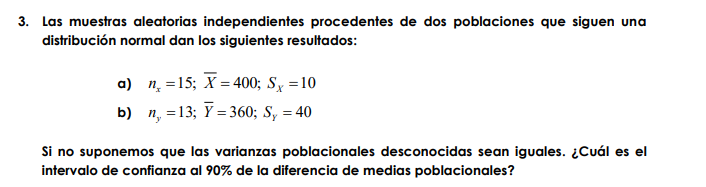

In [30]:
print(" 3) ")
_4IC_comp_poblac(15,13,400,360,10,40,10)

 3) 
4. I.C. Diferencia de Medias con varianzas desconocidas (asumidas distintas)
 ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  --- 
var1_muestral (S2_1):  100
var2_muestral (S2_2):  1600
alpha:  0.1
alpha_sobre_dos:  0.05
 ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  --- 

 >> satterthwaite_approx (v):  13.301756000534372
t_alpha_2 =  t(alpha/2=0.05;v=13.301756000534372)  =  1.7679
ME = 1.7678662568771224*11.390504367392595 =  20.13688831992486
Amplitud =  |20.13688831992486 * 2| =  40.27377663984972
(X1_barra - X2_barra)  =  40
LCI = 40 - 20.13688831992486 =  19.86311168007514
LCS = 40 + 20.13688831992486 =  60.136888319924864
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --


 Resultado: --> intervalo de confianza al 90.0%--> ( 19.86311168007514 ; 60.136888319924864 )


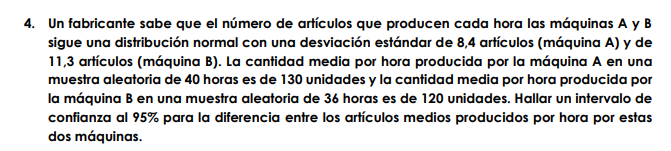


como no te dicen si son iguales o no ..,

El punto 4 es un caso similar al punto 2 en el sentido de que las desviaciones estándar poblacionales son conocidas (se mencionan explícitamente en el problema). Esto significa que podemos usar la distribución normal para calcular el intervalo de confianza de la diferencia entre las medias de las dos máquinas. En este caso, no necesitamos suponer que las varianzas poblacionales son iguales, ya que las desviaciones estándar de ambas máquinas ya se conocen

In [31]:
sigmaA = 8.4
sigmaB = 11.3

nA = 40
nB = 36

XA_barra = 130
XB_barra = 120
_3IC_comp_poblac(nA,nB,XA_barra,XB_barra,sigmaA, sigmaB,5)

3. I.C. Diferencia de Medias con varianzas desconocidas (asumidas iguales)
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --

var1_muestral (S2_1):  70.56
var2_muestral (S2_2):  127.69000000000001
alpha:  0.05
alpha_sobre_dos = alpha/2 =  0.025
(v = n1 + n2 - 2) =  74
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --

t_alpha_2 = t(0.025;v=74) = 1.9925
>>  ESTIMADOR DE VARIANZA MIXTA (Sp2):  97.58094594594596
ME = 1.9925434951809322*2.269384383589629  =  4.521847091586705
Amplitud = |4.521847091586705 * 2|  =  9.04369418317341
(X1_barra - X2_barra)  =  10
LCI = 10 - 4.521847091586705 =  5.478152908413295
LCS = 10 + 4.521847091586705 =  14.521847091586704
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --


 Resultado: --> intervalo de confianza al 95.0%--> ( 5.478152908413295 ; 14.521847091586704 )


ejercicio 5

enunciado
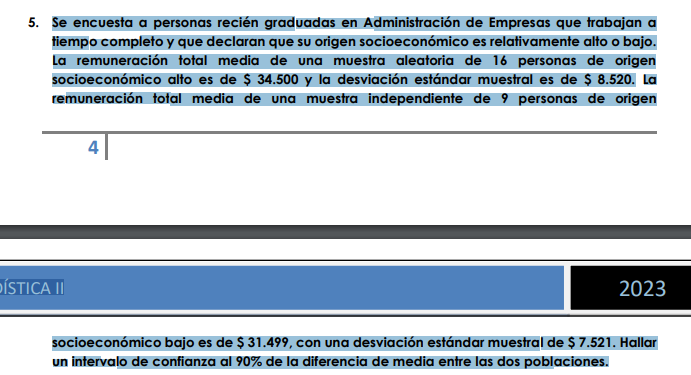


Si se asumen varianzas poblacionales iguales (prueba t con varianzas iguales): Cuando no se menciona nada explícito sobre las varianzas, muchas veces se asume que son iguales por simplicidad, especialmente si las desviaciones estándar muestrales no son demasiado diferentes.

Dado que las desviaciones estándar muestrales son 8,520 para el grupo de origen socioeconómico alto y 7,521 para el grupo de origen socioeconómico bajo, podríamos asumir que las varianzas poblacionales son aproximadamente iguales (ya que no son significativamente diferentes).

In [32]:
# caso 3, desconocemos varianzas poblacionales pero dad la similitud de sus desv. estandar muestrales decimios que un supuestos de que  las var. pobl. son iguales

# 3. I.C. Diferencia de Medias con varianzas desconocidas (asumidas iguales)
n1 =  16
X1_barra = 34500
std1_barra = 8520

n2 = 9
X2_barra = 31499
std2_barra = 7521

print("como el enunciado no te confirma que las varianzas sean iguales, entonces se consideran como distintas: \n")
print("'aca' elegimos el caso 3 pero lo pruedente seria el caso 4")
_3IC_comp_poblac(n1,n2,X1_barra, X2_barra, std1_barra, std2_barra, 10) # esta mal, porq desconcocemos las var. poblacioneales pero conocemos las var. muestrales # deberiamos de haber aplicado el caso 4

como el enunciado no te confirma que las varianzas sean iguales, entonces se consideran como distintas: 

'aca' elegimos el caso 3 pero lo pruedente seria el caso 4
3. I.C. Diferencia de Medias con varianzas desconocidas (asumidas iguales)
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --

var1_muestral (S2_1):  72590400
var2_muestral (S2_2):  56565441
alpha:  0.1
alpha_sobre_dos = alpha/2 =  0.05
(v = n1 + n2 - 2) =  23
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --

t_alpha_2 = t(0.05;v=23) = 1.7139
>>  ESTIMADOR DE VARIANZA MIXTA (Sp2):  67016501.217391305
ME = 1.7138715277470473*3410.9836175406112  =  5845.987703714478
Amplitud = |5845.987703714478 * 2|  =  11691.975407428956
(X1_barra - X2_barra)  =  3001
LCI = 3001 - 5845.987703714478 =  -2844.987703714478
LCS = 3001 + 5845.987703714478 =  8846.987703714478
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --


 Resultado: --> intervalo de confianza al 90.0%--> ( -2844.987703714478 ; 8846.987703714478 )


cuando el enunciado no avisa nada asumimos que es de igual varianza ? 

#### ejercicio 6

Un investigador planea estimar el efecto que produce un medicamento en las puntuaciones
que obtienen los sujetos que realizan una tarea de coordinación psicomotriz. Administra el
medicamento antes de la prueba a los miembros de una muestra aleatoria de 9 sujetos. La
puntuación media de este grupo es de 9,78 y la varianza muestral es de $ 17,64. Utiliza una
muestra aleatoria independiente de 10 sujetos como grupo control y le administra un placebo
antes de la prueba. La puntuación media de este grupo de control es de 15,10 y la varianza
muestral de 27,01. Suponiendo que las distribuciones poblacionales son normales y tienen
idéntica varianza, hallar un intervalo de confianza al 90% de la diferencia de las medias
poblacionales de las puntuaciones.


In [33]:
import math as m

# como para parcial
n1 = 9
X1_barra = 9.78
var1_muestral = 17.64
std1_muestral = m.sqrt(var1_muestral)

n2 = 10
X2_barra = 15.10
var2_muestral = 27.01
std2_muestral = m.sqrt(var2_muestral)

# poblaciones noramales
# suponesmos identica varianza, comoo lo que nos pide el enunciado
# hallar un intervalo de confianza al 90% de la diferencia de las medias poblaciones de las puntuaciones.

_3IC_comp_poblac(n1,n2,X1_barra, X2_barra, std1_muestral, std2_muestral, 10)

3. I.C. Diferencia de Medias con varianzas desconocidas (asumidas iguales)
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --

var1_muestral (S2_1):  17.64
var2_muestral (S2_2):  27.01
alpha:  0.1
alpha_sobre_dos = alpha/2 =  0.05
(v = n1 + n2 - 2) =  17
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --

t_alpha_2 = t(0.05;v=17) = 1.7396
>>  ESTIMADOR DE VARIANZA MIXTA (Sp2):  22.60058823529412
ME = 1.7396067260750672*2.1843157496382353  =  3.7998503699423765
Amplitud = |3.7998503699423765 * 2|  =  7.599700739884753
(X1_barra - X2_barra)  =  -5.32
LCI = -5.32 - 3.7998503699423765 =  -9.119850369942377
LCS = -5.32 + 3.7998503699423765 =  -1.5201496300576238
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --


 Resultado: --> intervalo de confianza al 90.0%--> ( -9.119850369942377 ; -1.5201496300576238 )


ejercicios de 

3.- Estimación para la diferencia de proporciones (muestras grandes)

1 - Se observó a los clientes de un supermercado y se los encuestó inmediatamente después que
colocaran un artículo en el carro. En una muestra aleatoria de 510 clientes que eligieron un
producto al precio vigente, 320 afirmaron que comprobaban el precio antes de colocarlo en
el carro. En una muestra aleatoria independiente de 332 que eligieron un producto a un precio
especial, 200 hicieron esta afirmación. Hallar un intervalo de confianza al 90% de la diferencia
entre las dos proporciones poblacionales.

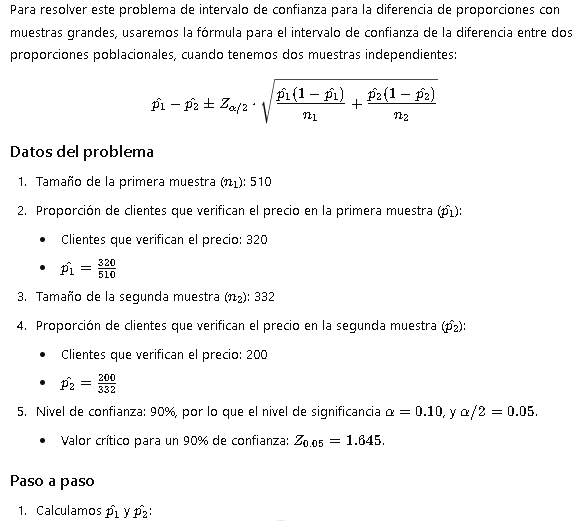

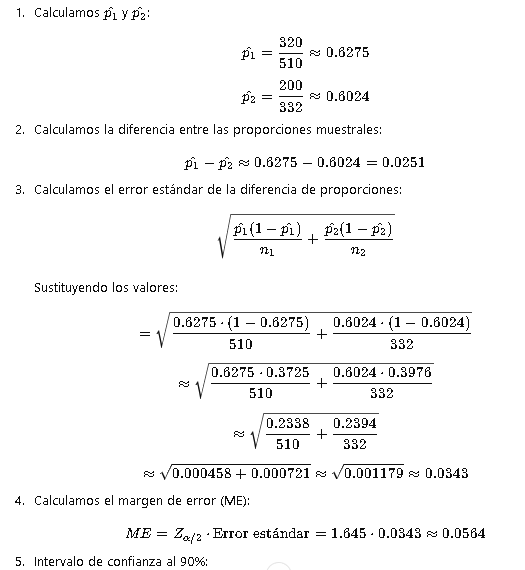

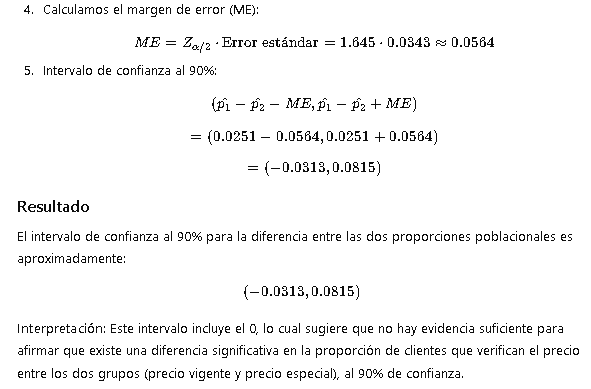

In [34]:
n1 = 510
x1 = 320

n2 = 332
x2 = 200

_5IC_comp_poblac(n1,n2,x1,x2,10)

5. I.C. Diferencia de Proporciones Poblacionales (muestras grandes)
 <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <>
datos base: 
 
x1 320
x2 200
n1 510
n2 332
p1 = (x1/n1) : 0.6274509803921569
p2 = (x2/n2) : 0.6024096385542169
 
 <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <>
calculos: 
 
alpha:  0.1
alpha_sobre_dos: 0.1/2 =  0.05
(p1 - p2) = (0.6274509803921569-0.6024096385542169) =  0.025041341837939934
Z_alpha_2  = Z(alpha/2) =0.05 =  1.6448536269514722

 
 > CALCULAMOS EL ESTIMADOR DE varianzas de diferencias de proporciones

>> sigma(1p-p2) = sigma(p1 - p2) = sigma(0.6274509803921569 - 0.6024096385542169)  = 0.03434775205553115


ME = 1.6448536269514722*0.03434775205553115 =  0.056497024546170296
LCI: (p1-p2)-ME = (0.6274509803921569 - 0.6024096385542169) - 0.0565  = 0.025041341837939934 - 0.056497024546170296 = -0.03145568270823036
LCS: (p1-p2)+ME = (0.6274509803921569 - 0.6024096385542169) + 0.0565  = 0.025041341837939934 + 0.056497024546170296 = 

ejercicio - Estimación para la diferencia de proporciones (muestras grandes)


2)

Se va a someter a votación una nueva suba de impuestos de un peso para financiar la
campaña de investigación de una determinada enfermedad. Se hace una encuesta a los
residentes de dos ciudades para recabar su opinión. En una de ellas, una encuesta realizada
recientemente a 225 residentes muestra que 140 apoyan la propuesta, 35 no saben y el resto
se opone. En la ciudad vecina, según los resultados de una encuesta aleatoria de 210
residentes, 120 apoyan la suba, 30 se oponen y el resto no sabe. Estimar la diferencia de
proporciones de residentes de estas dos ciudades que apoyan esta propuesta. Utilizar un nivel
de confianza del 95%.

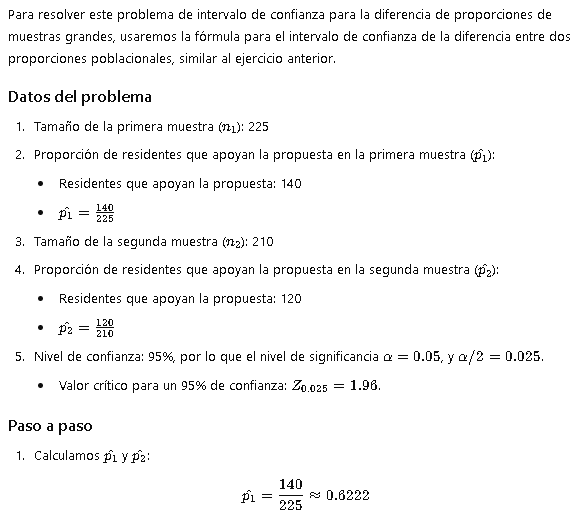

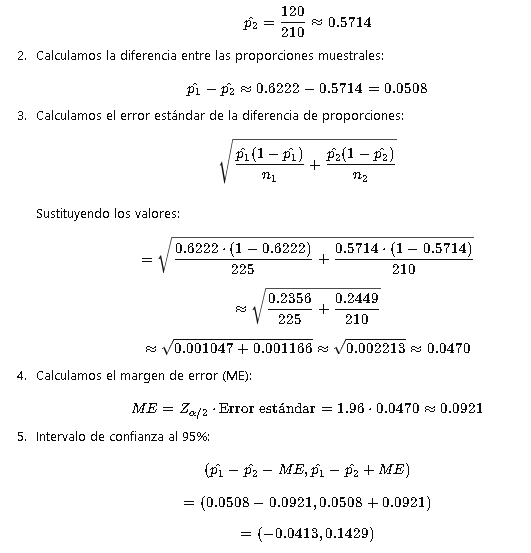

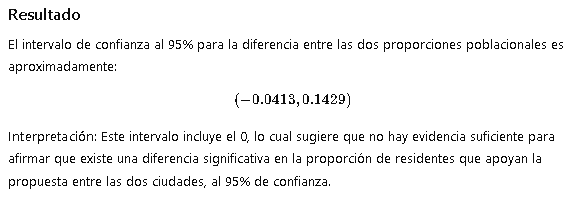

In [35]:
# ejercicio parece como de parcial. medio tramposo che. pero el enunciado pide de los que apoyan por lo que esta facil en este sentido

n1 = 225
x1 = 140

n2 = 210
x2 = 120
_5IC_comp_poblac(n1,n2,x1,x2,5)

5. I.C. Diferencia de Proporciones Poblacionales (muestras grandes)
 <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <>
datos base: 
 
x1 140
x2 120
n1 225
n2 210
p1 = (x1/n1) : 0.6222222222222222
p2 = (x2/n2) : 0.5714285714285714
 
 <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <>
calculos: 
 
alpha:  0.05
alpha_sobre_dos: 0.05/2 =  0.025
(p1 - p2) = (0.6222222222222222-0.5714285714285714) =  0.050793650793650835
Z_alpha_2  = Z(alpha/2) =0.025 =  1.959963984540054

 
 > CALCULAMOS EL ESTIMADOR DE varianzas de diferencias de proporciones

>> sigma(1p-p2) = sigma(p1 - p2) = sigma(0.6222222222222222 - 0.5714285714285714)  = 0.04702020364571419


ME = 1.959963984540054*0.04702020364571419 =  0.09215790569133875
LCI: (p1-p2)-ME = (0.6222222222222222 - 0.5714285714285714) - 0.0922  = 0.050793650793650835 - 0.09215790569133875 = -0.04136425489768791
LCS: (p1-p2)+ME = (0.6222222222222222 - 0.5714285714285714) + 0.0922  = 0.050793650793650835 + 0.09215790569133875 =  

ejercicio 3

estmación para la diferencia de proporciones (muestras grandes)

Según un artículo de prensa, el 75% de 400 personas encuestadas en una ciudad se oponen
a una sentencia judicial reciente. Según ese mismo artículo, solo el 45% de 500 personas
encuestadas en otra ciudad se opone a esa sentencia. Construir un intervalo de confianza al
95% de la diferencia de proporciones poblacionales.

In [36]:
n1 = 400
x1 = 400 * 0.75

n2 = 500
x2 = 500 * 0.45

_5IC_comp_poblac(n1,n2,x1,x2,5)

5. I.C. Diferencia de Proporciones Poblacionales (muestras grandes)
 <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <>
datos base: 
 
x1 300.0
x2 225.0
n1 400
n2 500
p1 = (x1/n1) : 0.75
p2 = (x2/n2) : 0.45
 
 <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <> <>
calculos: 
 
alpha:  0.05
alpha_sobre_dos: 0.05/2 =  0.025
(p1 - p2) = (0.75-0.45) =  0.3
Z_alpha_2  = Z(alpha/2) =0.025 =  1.959963984540054

 
 > CALCULAMOS EL ESTIMADOR DE varianzas de diferencias de proporciones

>> sigma(1p-p2) = sigma(p1 - p2) = sigma(0.75 - 0.45)  = 0.031044323152550773


ME = 1.959963984540054*0.031044323152550773 =  0.06084575530342246
LCI: (p1-p2)-ME = (0.75 - 0.45) - 0.0608  = 0.3 - 0.06084575530342246 = 0.23915424469657753
LCS: (p1-p2)+ME = (0.75 - 0.45) + 0.0608  = 0.3 + 0.06084575530342246 =  0.36084575530342244
 


 Resultado: --> intervalo de confianza al 95.0%--> ( 0.23915424469657753 ; 0.36084575530342244 )


#### ejercicios
###### 4.- Estimación para la razón de varianzas

Una muestra aleatoria de 200 vehículos que viajan sobre caminos de tierra en un distrito con
un límite de velocidad de 85 Kms/h dio como resultado una media muestral de 87,5 Kms/h
con una desviación estándar de 8,6 Kms/h. Otra muestra aleatoria de 200 vehículos en un
distrito con un límite de velocidad de 95 Kms/h resultó en una media muestral y una desviación
estándar muestral de 88,8 Kms/h y 9,2 Kms/h, respectivamente. Practicar un intervalo de
confianza al 95% para el cociente de las varianzas.

# lo dejo pendiente para la facultad

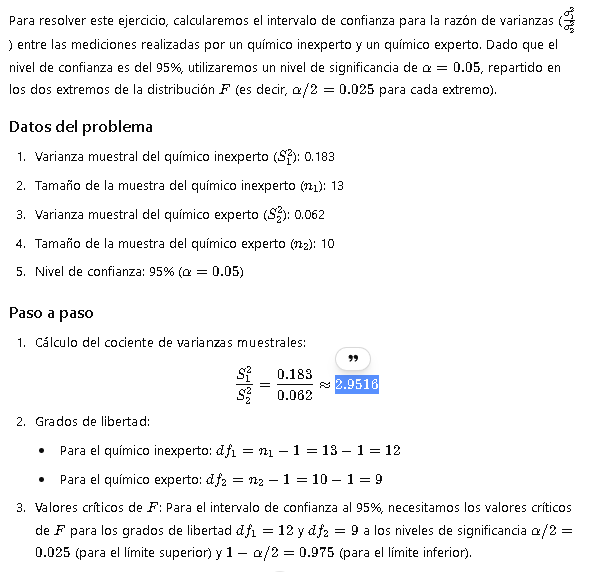

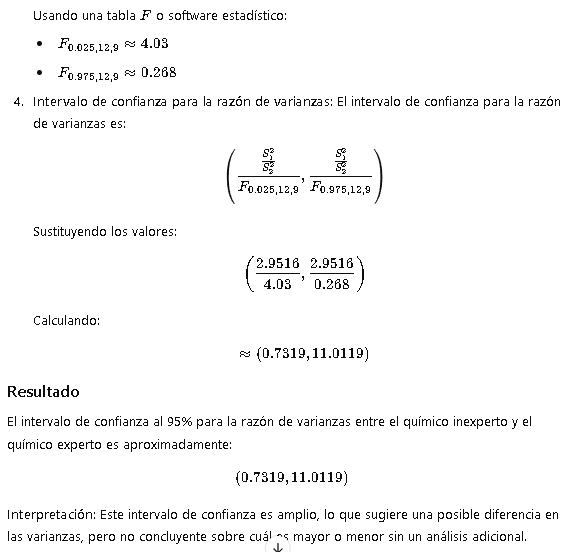

ejercicio 4.- Estimación para la razón de varianzas

Una muestra aleatoria de 200 vehículos que viajan sobre caminos de tierra en un distrito con
un límite de velocidad de 85 Kms/h dio como resultado una media muestral de 87,5 Kms/h
con una desviación estándar de 8,6 Kms/h. Otra muestra aleatoria de 200 vehículos en un
distrito con un límite de velocidad de 95 Kms/h resultó en una media muestral y una desviación
estándar muestral de 88,8 Kms/h y 9,2 Kms/h, respectivamente. Practicar un intervalo de
confianza al 95% para el cociente de las varianzas

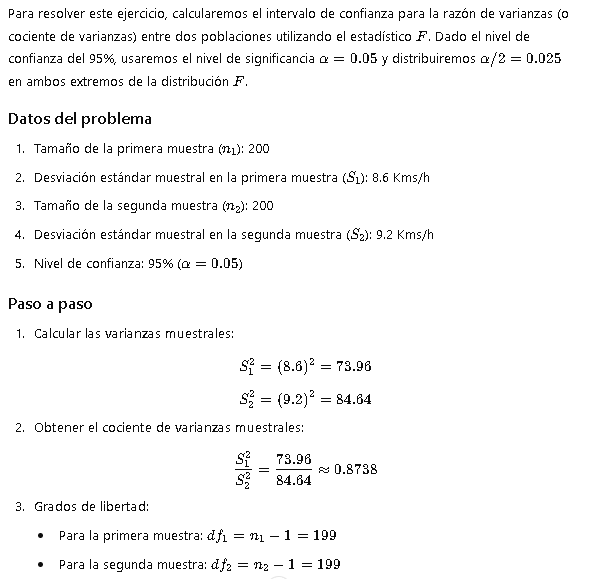

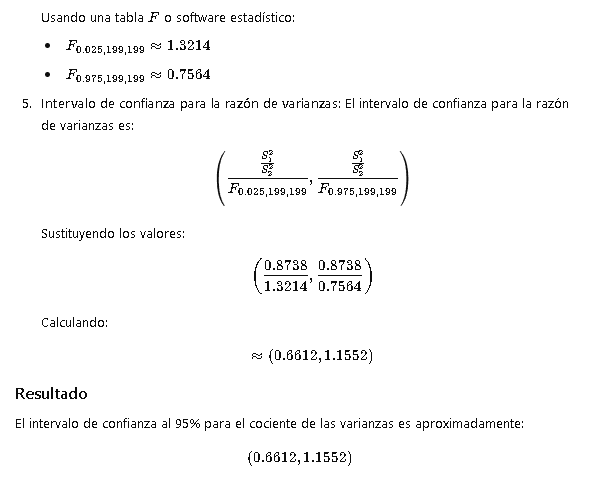

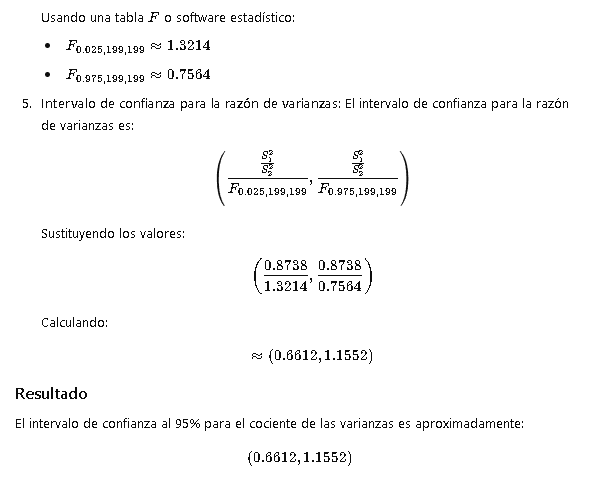

lo que suele hacer mal son los calculos que nosotros hariamos en el probability distribution

y lo que si suele hacer muy bien, y que me sorprendio, es con la interpretacion, y seleccion correcta de casos. ej. vos no sabes

que caso puede ser de varianzas, entonces automaticamente ya te sabe el caso. eso si, nada mejor que uno lo piense.



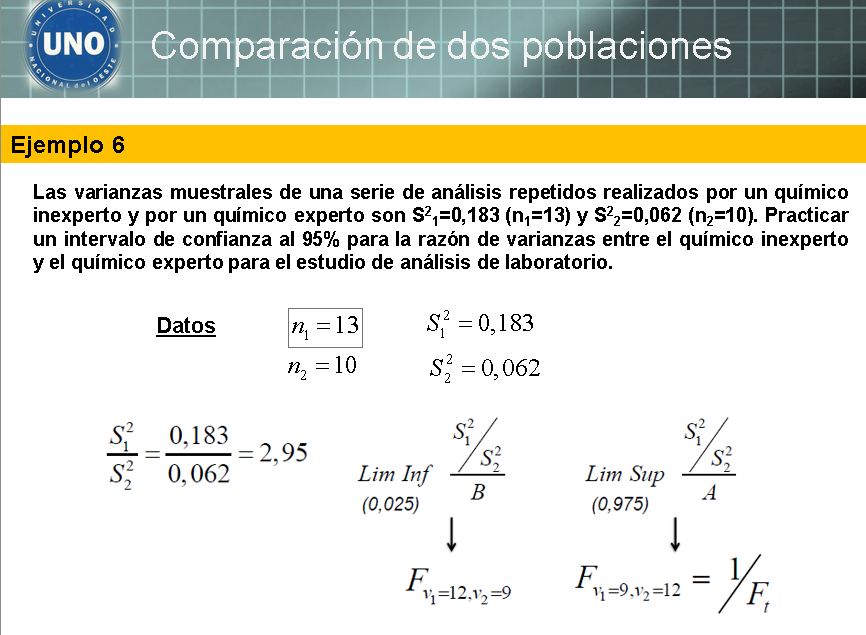

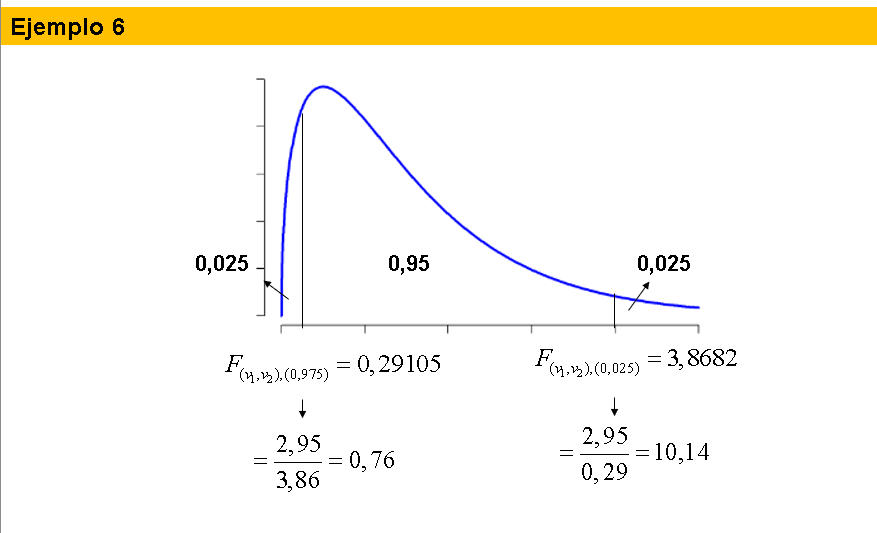

## funcion _6_IC_cociente de varianzas

In [37]:
from scipy.stats import f
# en este caso usamos la distribucion de F de scheneider



alpha = 5 # nivel de significación
# Datos # muestra
n1=13
n2=10
# Dato : var. muestrales
s1_2 = 0.183
s2_2 = 0.062

# fin de introduccion de los datos
def _6_IC_cociente_de_varianzas(alpha, n1,n2,s1_2,s2_2,):
    """ EJEMPLO DE USO: _6_IC_cociente_de_varianzas(5,13,10,0.183,0.062)
    
    DATOS EJEMPLO: 
    alpha = 5 # nivel de significación
    # Datos # muestra
    n1=13
    n2=10
    # Dato : var. muestrales
    s1_2 = 0.183
    s2_2 = 0.062
    """
    alpha = alpha/100
    print("funcion _6_IC_cociente de varianzas\n")
    print("-- --"*10)
    print("\n --  DATOS  --\n")
    print("n2 =",n1)
    print("n2 =",n2)
    
    print("s1_**2: ", s1_2)
    print("s2_**2: ", s2_2)
    print("\n --  ---  --\n")
    
    # fin de muesrta de los datos
    
    cociente = s1_2/s2_2
    print("\ncociente [s1_2/s2_2]:  ", cociente)
    
    dof_n = n1-1  # Grados de libertad del numerador # n1
    dof_d = n2-1  # Grados de libertad del denominador
    print("\n# Grados de libertad del numerador [n-1]  del (S):  ", dof_n)
    print("# Grados de libertad del denominador [n-1] :  ", dof_d)
    
    valor_critico_f_1 = f.ppf(1 - alpha/2, dof_n, dof_d) # valor critico # tambien conocido cmo F(v1;v2)
    valor_critico_f_2 = f.ppf(alpha/2, dof_n, dof_d) # valor critico # tambien conocido cmo F(v1;v2)
    
    print(f"\nvalor_critico_f_1: F({1 - alpha/2};v1={dof_n},v2={dof_d})", valor_critico_f_1) # para calc. el limite inf.
    print(f"valor_critico_f_2: F({alpha/2};v1={dof_n},v2={dof_d})",valor_critico_f_2) # para calc. el limite sup. # en el prob. distribuyon es P(X<x) = 0.025  da x= 0.29
    
    LCI = cociente/valor_critico_f_1
    LCS = cociente/valor_critico_f_2

    print("-- --"*10)
    print("\n -- Resultado -- ")
    
    print(f"\nLCI ({cociente:.4f}/{valor_critico_f_1:.4f}):  ", LCI)
    print(f"LCS  ({cociente:.4f}/{valor_critico_f_2:.4f}):  ", LCS)
    print(f"\nintervalo con un nivel de confianza del {(1-alpha)*100}%:  \n")
    print(f"( {LCI:.4f} : {LCS:.4f} ) \n")
    
    print("-- --"*10)

_6_IC_cociente_de_varianzas(alpha,13,10,0.183,0.062)

funcion _6_IC_cociente de varianzas

-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --

 --  DATOS  --

n2 = 13
n2 = 10
s1_**2:  0.183
s2_**2:  0.062

 --  ---  --


cociente [s1_2/s2_2]:   2.9516129032258065

# Grados de libertad del numerador [n-1]  del (S):   12
# Grados de libertad del denominador [n-1] :   9

valor_critico_f_1: F(0.975;v1=12,v2=9) 3.8682203228432703
valor_critico_f_2: F(0.025;v1=12,v2=9) 0.29104916350617555
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --

 -- Resultado -- 

LCI (2.9516/3.8682):   0.7630415687016175
LCS  (2.9516/0.2910):   10.141286330009255

intervalo con un nivel de confianza del 95.0%:  

( 0.7630 : 10.1413 ) 

-- ---- ---- ---- ---- ---- ---- ---- ---- ---- --


## -----

In [38]:
import pandas as pd
# de la guia 8: 
data = {
    # "Hembra": range(1, 26),
    "Antiguo": [17.76, 18.66, 21.84, 16.64, 17.37, 16.75, 18.01, 22.00, 17.68, 18.23, 
                20.63, 20.03, 15.90, 15.89, 18.53, 18.32, 15.60, 19.05, 18.04, 19.80, 
                19.90, 18.99, 21.02, 15.62, 15.41],
    "Nuevo": [18.15, 19.92, 23.60, 17.96, 16.25, 17.5, 20.79, 22.89, 20.55, 20.95, 
              22.76, 20.64, 14.67, 16.15, 22.56, 15.46, 16.33, 18.51, 24.02, 22.36, 
              24.53, 25.36, 26.36, 18.56, 14.02]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Configurar la columna "Hembra" como índice
# df.set_index("Hembra", inplace=True)

print(df)


    Antiguo  Nuevo
0     17.76  18.15
1     18.66  19.92
2     21.84  23.60
3     16.64  17.96
4     17.37  16.25
5     16.75  17.50
6     18.01  20.79
7     22.00  22.89
8     17.68  20.55
9     18.23  20.95
10    20.63  22.76
11    20.03  20.64
12    15.90  14.67
13    15.89  16.15
14    18.53  22.56
15    18.32  15.46
16    15.60  16.33
17    19.05  18.51
18    18.04  24.02
19    19.80  22.36
20    19.90  24.53
21    18.99  25.36
22    21.02  26.36
23    15.62  18.56
24    15.41  14.02


In [39]:
df["d"] = df['Nuevo'] - df['Antiguo']
display(df)

d_barra = df["d"].mean()
s = df["d"].std(ddof=1)

print("x_barra = ", d_barra, "  \n s =", s)

,Antiguo,Nuevo,d
0,17.76,18.15,0.39
1,18.66,19.92,1.26
2,21.84,23.60,1.76
3,16.64,17.96,1.32
4,17.37,16.25,-1.12
5,16.75,17.50,0.75
6,18.01,20.79,2.78
7,22.00,22.89,0.89
8,17.68,20.55,2.87
9,18.23,20.95,2.72


x_barra =  1.7271999999999996   
 s = 2.3551849184299734


# guia 8 || practiica a hoja  y compu
# aplicamos aprox. de sat para la guia 8. 

In [40]:
satterthwaite_approx(400,625,25,25) # para varianzas desconocidas y asumidas distintas

def v_asumida_igual(n1,n2):
    v = n1 + n2 -2
    return v


## una consulta para el 2 punto del caso 2 

respuesta dada : 

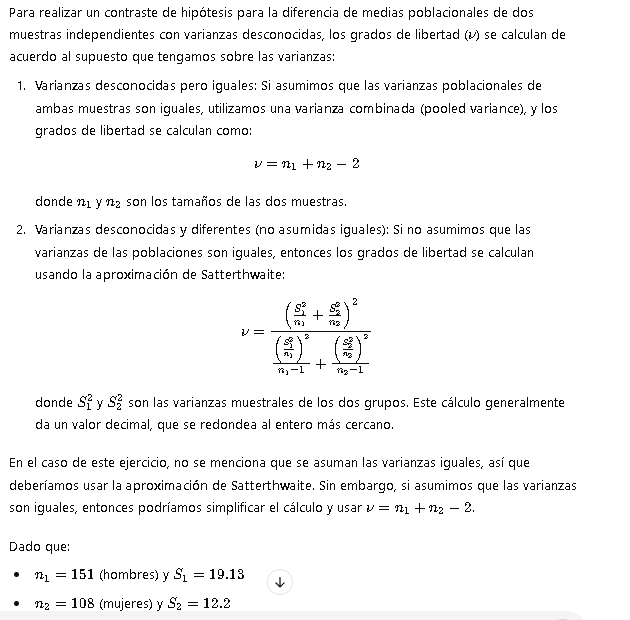